## INSTALLING PACKAGES CUDA

In [ ]:
!apt update && apt install cuda-11-8

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,848 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,118 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe am

## INSTALLING PYTHON PACKAGES

In [ ]:
# install dependencies
!pip install geemap
!pip install wxee

!pip install rioxarray==0.14.1
!pip install xarray==2022.12.0
!pip install rasterio==1.3.8
!pip install cftime
!pip install netCDF4

!pip install rarfile segmentation-models git+https://github.com/davej23/image-segmentation-keras.git
!pip install keras==2.11.0
!pip install tensorflow==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: rioxarray
    Found existing installation: rioxarray 0.15.7
    Uninstalling rioxarray-0.15.7:
      Successfully uninstalled rioxarray-0.15.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.0/970.0 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 3.9 MB/s eta 0:00:00
  Attempting uninstall: rasterio
    Found existing installation: rasterio 1.3.10
    Uninstalling rasterio-1.3.10:
      Successfully uninstalled rasterio-1.3.10
     ━━━━━━━━━━━━━━━━━━━━━━

## **LOADING PACKAGES**


In [ ]:
# !pip install --upgrade cuda-python

In [ ]:
!pip list | grep tensorflow

tensorflow                       2.11.0
tensorflow-datasets              4.9.6
tensorflow-estimator             2.11.0
tensorflow-gcs-config            2.15.0
tensorflow-hub                   0.16.1
tensorflow-io-gcs-filesystem     0.37.0
tensorflow-metadata              1.15.0
tensorflow-probability           0.23.0


In [ ]:
!pip list | grep keras

keras                            2.11.0
tf_keras                         2.15.1


In [ ]:
!pip list | grep cuda

cuda-python                      12.2.1
cupy-cuda12x                     12.2.0
jaxlib                           0.4.26+cuda12.cudnn89


In [ ]:
# import dependencies
import ee
import geemap
import wxee

import requests
from PIL import Image
import pandas as pd
import numpy as np
import xarray
import rioxarray
import matplotlib.pyplot as plt
from netCDF4 import num2date
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

In [ ]:
from keras.models import *
from keras.metrics import *
from keras.layers import *
from keras.optimizers import *
from keras.losses import *
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam_v2 # not used

In [ ]:
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.11.0

Num GPUs Available:  0


## ENVIRONMENT CONFIGURATION

In [ ]:
# Log of the tests
# test_1 : 0.7 - 0.3
# test_2 : 0.6 - 0.4
# test_3 : 0.5 - 0.5
# test_4 : 0.8 - 0.2

# test_1_z : 0.7 - 0.3
# test_2_z : 0.6 - 0.4

# test_1_p1_p99: 0.7 - 0.3

In [ ]:
dataset_name = "dataset_02_mean"
test_name = "test_3_p1_p99"

dataset_dir = f"/gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/Dataset/{dataset_name}/"
result_dir = f"/gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/results/{dataset_name}/{test_name}/"

dataset_sent1_dir = f"/gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/Dataset/{dataset_name}/sentinel1"
download_sent1 = False

dataset_sent2_dir = f"/gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/Dataset/{dataset_name}/sentinel2"
download_sent2 = False

dataset_forest_dir = f"/gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/Dataset/{dataset_name}/forest"
download_forest = False

dataset_sent_cloud_dir = f"/gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/Dataset/{dataset_name}/sentinel2cloud"
download_sent_cloud = False

unet_sent2_model_name = "unet-sent2.hdf5"
unet_sent2_history = "unet-sent2-history.npy"

am_unet_sent2_model_name = "am-unet-sent2.hdf5"
am_unet_sent2_history = "am-unet-sent2-history.npy"

resnet50segnet_sent2_model_name = "resnet50segnet-sent2.hdf5"
resnet50segnet_sent2_history = "resnet50segnet-sent2-history.npy"

fcn32_sent2_model_name = "fcn32-sent2.hdf5"
fcn32_sent2_history = "fcn32-sent2-history.npy"

unet_sent1_model_name = "unet-sent1.hdf5"
unet_sent1_history = "unet-sent1-history.npy"

am_unet_sent1_model_name = "am-unet-sent1.hdf5"
am_unet_sent1_history = "am-unet-sent1-history.npy"

resnet50segnet_sent1_model_name = "resnet50segnet-sent1.hdf5"
resnet50segnet_sent1_history = "resnet50segnet-sent1-history.npy"

fcn32_sent1_model_name = "fcn32-sent1.hdf5"
fcn32_sent1_history = "fcn32-sent1-history.npy"


eps = 30 # epochs
batch_s = 1 # batch size

metrics_list = [TruePositives(), TrueNegatives(), Precision(), Recall(), FalseNegatives(), FalsePositives(), BinaryIoU(), IoU(2, target_class_ids=(0, 1)), BinaryAccuracy(), MeanSquaredError()]

class_weight_list = [5.0, 5.0] # weight in the loss for class 0 and 1

print(f"dataset_dir: {dataset_dir}")
print(f"result_dir: {result_dir}")

dataset_dir: /gdrive/MyDrive/ML-for-Agriforestry/Researches/Deforestation/Scripts/Ivory_coast/Dataset/dataset_02_mean/
result_dir: /gdrive/MyDrive/ML-for-Agriforestry/Researches/Deforestation/Scripts/Ivory_coast/results/dataset_02_mean/test_3_p1_p99/


In [ ]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
p1_sent2 = np.load(f"{dataset_dir}/p1_factors_sent2.npy")
p99_sent2 = np.load(f"{dataset_dir}/p99_factors_sent2.npy")

p1_sent1 = np.load(f"{dataset_dir}/p1_factors_sent1.npy")
p99_sent1 = np.load(f"{dataset_dir}/p99_factors_sent1.npy")

In [ ]:
import os.path
from os import path

if path.exists(dataset_dir) == False:
  os.mkdir(dataset_dir)
  print(f"Created dir: {dataset_dir}")

if path.exists(f"/gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/results/{dataset_name}") == False:
  os.mkdir(f"/gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/results/{dataset_name}")
  print(f"Created dir: /gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/results/{dataset_name}")

if path.exists(result_dir) == False:
  os.mkdir(result_dir)
  print(f"Created dir: {result_dir}")

Created dir: /gdrive/MyDrive/ML-for-Agriforestry/Researches/Deforestation/Scripts/Ivory_coast/results/dataset_02_mean/test_3_p1_p99/


In [ ]:
# Configuring GEE

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='cote-ivoire-cocoa')

wxee.Initialize()

### **LOAD DATASETS**

In [ ]:
# Define area of interests
CI_borders = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filter(ee.Filter.eq('country_na','Cote d\'Ivoire'))

# TOP RIGHT -4.7731, 7.1474
# BOTTOM LEFT -6.0969, 5.5697
grid = ee.Geometry.BBox(-6.0969, 5.5697, -4.7731, 7.1474).coveringGrid('EPSG:4326', 2560)

print(f"Number of tiles: {grid.size()}")

roi = grid.geometry()
grid.size()

Number of tiles: ee.Number({
  "functionInvocationValue": {
    "functionName": "Collection.size",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Geometry.coveringGrid",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          -6.096900000000005,
                          7.1474
                        ],
                        [
                          -6.096900000000005,
                          5.5697
                        ],
                        [
                          -4.7730999999999995,
                          5.5697
                        ],
                        [
                          -4.7730999999999995,
               

In [ ]:
years = ee.List(['2018', '2019', '2020']) # overlap between sentinel and jaxa dataset
year = 2

JAXA Dataset

Value 	Color 	Description

1 	#00b200 	Dense Forest

2 	#83ef62 	Non-dense Forest

3 	#ffff99 	Non-Forest

4 	#0000ff 	Water

In [ ]:
def map_sentinel1(roi,year):
  sent1 = ee.ImageCollection("COPERNICUS/S1_GRD") #ATTENZIONE IN ALCUNE IMMAGINI NON C'è LA VV E DA ERRORE! DA SCRIVERE CON UN IF
  sent1 = sent1.filterDate(ee.String(years.get(year)).cat('-05-01'),ee.String(years.get(year)).cat('-09-30') ).filterBounds(CI_borders).select('VV','VH').mean() #.select(['HH','HV']) #.select('VV','VH','VV','HV') selected all
  sent1 = sent1.clip(roi)
  return sent1

def map_sentinel2(roi, year, perc_cloud = 20):
  # Sentinel-2
  # B4,3,2 RGB + B8 NIR 10m
  sent2 = ee.ImageCollection("COPERNICUS/S2_SR")
  sent2 = sent2.filterDate(ee.String(years.get(year)).cat('-05-01'),ee.String(years.get(year)).cat('-09-30') ).filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', perc_cloud)).filterBounds(CI_borders).select(['B4','B3','B2','B8']).mean()
  sent2 = sent2.clip(roi)
  return sent2

def map_forest(roi, year):
  forest = ee.ImageCollection("JAXA/ALOS/PALSAR/YEARLY/FNF4")
  forest = forest.filterDate(ee.String(years.get(year)).cat('-01-01'),ee.String(years.get(year)).cat('-12-31') ).filterBounds(CI_borders).mosaic()
  forest = forest.clip(roi)
  return forest

def map_sent2_cloud(roi, year):
  s2_cloudless_col = (ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY'))
  s2_cloudless_col = s2_cloudless_col.filterDate(ee.String(years.get(year)).cat('-05-01'),ee.String(years.get(year)).cat('-09-30') ).filterBounds(CI_borders).mean()
  s2_cloudless_col = s2_cloudless_col.clip(roi)
  return s2_cloudless_col

/**
 * Function to mask clouds using the Sentinel-2 QA band
 * @param {ee.Image} image Sentinel-2 image
 * @return {ee.Image} cloud masked Sentinel-2 image
 */
function maskS2clouds(image) {
  var qa = image.select('QA60');

  // Bits 10 and 11 are clouds and cirrus, respectively.
  var cloudBitMask = 1 << 10;
  var cirrusBitMask = 1 << 11;

  // Both flags should be set to zero, indicating clear conditions.
  var mask = qa.bitwiseAnd(cloudBitMask).eq(0)
      .and(qa.bitwiseAnd(cirrusBitMask).eq(0));

  return image.updateMask(mask).divide(10000);
}

// COPERNICUS/S1_GRD
// COPERNICUS/S2_SR

var dataset = ee.ImageCollection('COPERNICUS/S2_SR')
                  .filterDate('2020-05-01', '2020-10-01')
                  // Pre-filter to get less cloudy granules.
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',15));

var visualization = {
  min: -1800.0,
  max: 4000,
  bands: ['B4', 'B3', 'B2'],
};

Map.setCenter(-5.461, 7.535, 7);

Map.addLayer(dataset.mosaic(), visualization, 'RGB');


In [ ]:
sent1 = map_sentinel1(roi, year)
sent2 = map_sentinel2(roi, year, 20)
forest = map_forest(roi, year)
cloud = map_sent2_cloud(roi, year)

/usr/local/lib/python3.10/dist-packages/ee/deprecation.py:204: DeprecationWarning: 

Attention required for COPERNICUS/S2_SR! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR

  warnings.warn(warning, category=DeprecationWarning)


In [ ]:
# forest = ee.ImageCollection("JAXA/ALOS/PALSAR/YEARLY/FNF4").filterDate(ee.String("2020").cat('-01-01'),ee.String("2020").cat('-12-31') )
# date = ee.Date(forest.first().get('system:time_start'))

# date_dict = date.getInfo()

# print("The number of milliseconds since 1970-01-01T00:00:00Z.: ", date_dict['value'])

# print("Formatted date", date.format('Y-M-d').getInfo())

In [ ]:
type(sent2)

ee.image.Image

In [ ]:
vizParams_sent2 = {
  'bands' : ['B4','B3','B2'],
  'min': -2000,
  'max': 3000,
}
vizParams_forest = {
  'min': 1,
  'max': 4,
  'palette': ['006400', 'feff99', '0000ff'],
}

vizParams_sent2_cloud = {
  'bands' : ['probability'],
  'min': 0,
  'max': 100,
}

Map = geemap.Map()
Map.addLayer(CI_borders, None, 'Ivory Coast', False)
Map.addLayer(grid,{'color':'yellow'},'grid')
Map.addLayer(sent2,vizParams_sent2,'sent2')
Map.addLayer(forest, vizParams_forest, 'forest')
# Map.addLayer(cloud, vizParams_sent2_cloud,'sent2_cloud')
Map.centerObject(forest)

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
sent1_ex = sent1.clip(grid.toList(grid.size()).get(526))
sent2_ex = sent2.clip(grid.toList(grid.size()).get(526))
forest_ex = forest.clip(grid.toList(grid.size()).get(526))
cloud_ex = cloud.clip(grid.toList(grid.size()).get(526))

In [ ]:
Map = geemap.Map()
Map.addLayer(sent2_ex,vizParams_sent2,'sent2_ex')
Map.addLayer(forest_ex, vizParams_forest, 'forest_ex')
Map.addLayer(cloud_ex, vizParams_sent2_cloud, 'cloud_ex')
Map.centerObject(sent2_ex)

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
# Random pick of images in the space
NUM_DOWNLOAD_TILES = 500 # number of tiles we want to download
NUM_MAP_TILES = grid.size().getInfo()

np.random.seed(0)
tiles_index_list = np.random.choice(NUM_MAP_TILES, NUM_DOWNLOAD_TILES, replace=False)

print(tiles_index_list)

[3434 3081 3889 4034  690 2906 3860  185 1757  546 2472 2809 3864 2306
  768  142 2907  326  482   87 2315 3404  735 1702  962 1657 2180 3180
 1271 3913  572 1431  217 1759  569  576 2845 2817 1831 4061 1098 2615
 1281 2667  776  514 2892 1590 1012  530 1991 1861   31  914 1237 2382
 2184 3416  704 3783 3857 1712 1292 1240  867 3805 3848 2329 2123 3861
  502 2661 3458  683 3566 1811 1898 2212 3242 1127 2095 2234  214  939
 4048 3074 1239 3098  452 3006  678  598  531   45 3197  311 2211  983
  685 2567  501 3534 3131 2736 1535 3840  799 3603 3267 2063  352 4006
  224 2365 2682 2655 1114 2542 1069 2801 2951  868 2473  302  751 3324
   33 3997  465 1283  304  381 3275 3793 2590 1710 1388  668  775  578
 2878 3124 3410 2166 1892 1032  896 2688 1544 3099  457 3121 2727  347
 1021   88 3145  836 2407 3794 1835 3835 1366 2928 1695 2522 1300 3268
 3418 1602 1267 2284 2551 3159  651 3599 1830    1  481 3682 3469 3307
 1939 2066 3170 1894 2377 1005  965 1675 3930 2254   70 2785   85 1082
 1703 

In [ ]:
def save_image_sent1_to_tiff(image, index):
  name_tif = f'{dataset_sent1_dir}/image_{index}.tiff'
  url = image.getDownloadUrl({
                'name': name_tif,
                'bands': ['VV','VH'],
                'region': ee.Feature(grid.toList(grid.size()).get(index)).geometry(),
                'scale':10,
                'nodata': 0,
                'masked': False,
                'format': 'GEO_TIFF',
                'filePerBand': False
            })
  response = requests.get(url)
  with open(name_tif, 'wb') as fd: #specificato da non salvare su gdrive
      print(f"Saving {name_tif}")
      fd.write(response.content)
      fd.close()

In [ ]:
# save sentinel data
if path.exists(dataset_sent1_dir) == False:
  os.mkdir(dataset_sent1_dir)
  print(f"Created dir: {dataset_sent1_dir}")

if download_sent1:
  for i in range(grid.size().getInfo()): # download all the tiles
    save_image_sent1_to_tiff(sent1, int(i))

In [ ]:
def save_image_to_tiff(image, index):
  name_tif = f'{dataset_sent2_dir}/image_{index}.tiff'
  url = image.getDownloadUrl({
                'name': name_tif,
                'bands': ['B4','B3','B2','B8'],
                'region': ee.Feature(grid.toList(grid.size()).get(index)).geometry(),
                'scale': 10,
                'nodata': 0,
                'masked': False,
                'format': 'GEO_TIFF',
                'filePerBand': False
            })
  response = requests.get(url)
  with open(name_tif, 'wb') as fd: #specificato da non salvare su gdrive
      print(f"Saving {name_tif}")
      fd.write(response.content)
      fd.close()

In [ ]:
# save sentinel data
if path.exists(dataset_sent2_dir) == False:
  os.mkdir(dataset_sent2_dir)
  print(f"Created dir: {dataset_sent2_dir}")

if download_sent2:
  for i in range(grid.size().getInfo()): # download all the tiles
    save_image_to_tiff(sent2, int(i))

In [ ]:
# load forest/non-forest data
def save_label_to_tiff(image, index):
  name_tif = f'{dataset_forest_dir}/image_{index}.tiff'
  url = image.getDownloadUrl({
                'name': name_tif,
                'region': ee.Feature(grid.toList(grid.size()).get(index)).geometry(),
                'scale': 10,
                'nodata': 0,
                'masked': False,
                'format': 'GEO_TIFF',
                'filePerBand': False
            })
  response = requests.get(url)
  with open(name_tif, 'wb') as fd: #specificato da non salvare su gdrive
      print(f"Saving {name_tif}")
      fd.write(response.content)
      fd.close()

In [ ]:
# save forest data
if path.exists(dataset_forest_dir) == False:
  os.mkdir(dataset_forest_dir)
  print(f"Created dir: {dataset_forest_dir}")

if download_forest:
  for i in range(grid.size().getInfo()): # download all the tiles
    save_label_to_tiff(forest, int(i))

In [ ]:
def save_cloud_to_tiff(image, index):
  name_tif = f'{dataset_sent_cloud_dir}/image_{index}.tiff'
  url = image.getDownloadUrl({
                'name': name_tif,
                'bands': ['probability'],
                'region': ee.Feature(grid.toList(grid.size()).get(index)).geometry(),
                'scale': 10,
                'nodata': 0,
                'masked': False,
                'format': 'GEO_TIFF',
                'filePerBand': False
            })
  response = requests.get(url)
  with open(name_tif, 'wb') as fd: #specificato da non salvare su gdrive
      print(f"Saving {name_tif}")
      fd.write(response.content)
      fd.close()

In [ ]:
# save forest data
if path.exists(dataset_sent_cloud_dir) == False:
  os.mkdir(dataset_sent_cloud_dir)
  print(f"Created dir: {dataset_sent_cloud_dir}")

if download_sent_cloud:
  for i in range(grid.size().getInfo()): # download all the tiles
    save_cloud_to_tiff(cloud, i)

## PREPARE TRAINING DATASET (SENTINEL2)

In [ ]:
import re

# helper function to perform sort
def num_sort(test_string):
    return list(map(int, re.findall(r'\d+', test_string)))[0]

In [ ]:
def calculate_sample_weights(label):
  # The weights for each class, with the constraint that:
  #     sum(class_weights) == 1.0
  class_weights = tf.constant(class_weight_list)
  class_weights = class_weights/tf.reduce_sum(class_weights)

  # Create an image of `sample_weights` by using the label at each pixel as an
  # index into the `class weights` .
  sample_weights = tf.gather(class_weights, indices=tf.cast(label, tf.int32))

  return sample_weights

In [ ]:
# Read dataset
import os
from sklearn.model_selection import train_test_split

training_images = []
labels_images = []

sent2_images_list = os.listdir(dataset_sent2_dir) # sentinel images names
forest_images_list = os.listdir(dataset_forest_dir) # forest images names

sent2_images_list.sort(key=num_sort)
forest_images_list.sort(key=num_sort)

# for img_name in forest_images_list:
#   img_xarr = xarray.open_rasterio(f"{dataset_forest_dir}/{img_name}")
#   img_xarr_t = img_xarr.transpose('y','x','band')
#   img_xarr_clf = (img_xarr_t < 3) * 1 # dense and non-dense forest conversion
#   train_f_pixels = img_xarr_clf.where(img_xarr_clf == 1).count()
#   train_nf_pixels = img_xarr_clf.where(img_xarr_clf < 1).count()
#   percentage = train_f_pixels / (train_f_pixels + train_nf_pixels)

#   if percentage > 0.85:
#     print(f"Percentage: {percentage}")
#     sent2_images_list.remove(img_name)
#     forest_images_list.remove(img_name)


In [ ]:
x = [1,2,3]
for i in [1,2]:
  x.remove(i)
print(x)

[3]


In [ ]:
NUM_IMGS = 1000

In [ ]:
X_train_list, X_test_val_list, y_train_list, y_test_val_list = train_test_split(sent2_images_list[:NUM_IMGS], forest_images_list[:NUM_IMGS], test_size=0.30, random_state=42)

X_val_list, X_test_list, y_val_list, y_test_list = train_test_split(X_test_val_list, y_test_val_list, test_size=0.5, random_state=42)

In [ ]:
# training set creation
X_train = []
y_train = []
w_train = []

invalid_images_list = []

for img_name in X_train_list:
  try:
    img_xarr = xarray.open_rasterio(f"{dataset_sent2_dir}/{img_name}")
    img_xarr_t = img_xarr.transpose('y','x','band')
    X_train.append(img_xarr_t) # applying normalization
  except Exception as ex:
    print(f"Exception: {ex}... Ignoring img {img_name}")
    invalid_images_list.append(img_name)

for img in invalid_images_list:
  y_train_list.remove(img)
  print(f"Removed {img} from y_train_list")

for img_name in y_train_list:
  img_xarr = xarray.open_rasterio(f"{dataset_forest_dir}/{img_name}")
  img_xarr_t = img_xarr.transpose('y','x','band')
  img_xarr_clf = (img_xarr_t < 3) * 1 # dense and non-dense forest conversion
  y_train.append(img_xarr_clf)
  w = calculate_sample_weights(img_xarr_clf)
  w_train.append(w)

In [ ]:
# validation set creation
X_val = []
y_val = []
invalid_images_list = []

for img_name in X_val_list:
  try:
    img_xarr = xarray.open_rasterio(f"{dataset_sent2_dir}/{img_name}")
    img_xarr_t = img_xarr.transpose('y','x','band')
    X_val.append(img_xarr_t) # applying normalization
  except Exception as ex:
    print(f"Exception: {ex}... Ignoring img {img_name}")
    invalid_images_list.append(img_name)

for img in invalid_images_list:
  y_val_list.remove(img)
  print(f"Removed {img} from y_val_list")

for img_name in y_val_list:
  img_xarr = xarray.open_rasterio(f"{dataset_forest_dir}/{img_name}")
  img_xarr_t = img_xarr.transpose('y','x','band')
  img_xarr_clf = (img_xarr_t < 3) * 1 # dense and non-dense forest conversion
  y_val.append(img_xarr_clf)

In [ ]:
# test set creation
X_test = []
y_test = []
invalid_images_list = []

for img_name in X_test_list:
  try:
    img_xarr = xarray.open_rasterio(f"{dataset_sent2_dir}/{img_name}")
    img_xarr_t = img_xarr.transpose('y','x','band')
    X_test.append(img_xarr_t) # applying normalization
  except Exception as ex:
    print(f"Exception: {ex}... Ignoring img {img_name}")
    invalid_images_list.append(img_name)

for img in invalid_images_list:
  y_test_list.remove(img)
  print(f"Removed {img} from y_test_list")

for img_name in y_test_list:
  img_xarr = xarray.open_rasterio(f"{dataset_forest_dir}/{img_name}")
  img_xarr_t = img_xarr.transpose('y','x','band')
  img_xarr_clf = (img_xarr_t < 3) * 1 # dense and non-dense forest conversion
  y_test.append(img_xarr_clf)

print(f"Training set dimensions: X {len(X_train)}, y {len(y_train)}")
print(f"Validation set dimensions: X {len(X_val)}, y {len(y_val)}")
print(f"Test set dimensions: X {len(X_test)}, y {len(y_test)}")

Training set dimensions: X 700, y 700
Validation set dimensions: X 150, y 150
Test set dimensions: X 150, y 150


In [ ]:
w_train[0]

<tf.Tensor: shape=(256, 256, 1), dtype=float32, numpy=
array([[[0.5],
        [0.5],
        [0.5],
        ...,
        [0.5],
        [0.5],
        [0.5]],

       [[0.5],
        [0.5],
        [0.5],
        ...,
        [0.5],
        [0.5],
        [0.5]],

       [[0.5],
        [0.5],
        [0.5],
        ...,
        [0.5],
        [0.5],
        [0.5]],

       ...,

       [[0.5],
        [0.5],
        [0.5],
        ...,
        [0.5],
        [0.5],
        [0.5]],

       [[0.5],
        [0.5],
        [0.5],
        ...,
        [0.5],
        [0.5],
        [0.5]],

       [[0.5],
        [0.5],
        [0.5],
        ...,
        [0.5],
        [0.5],
        [0.5]]], dtype=float32)>

In [ ]:
X_train[0].shape

(256, 256, 4)

In [ ]:
# Normalization (X - min)/(max - min) --> (X - p1) / (p99 - p1)
X_train = (X_train - p1_sent2) / (p99_sent2 - p1_sent2)
X_val = (X_val - p1_sent2) / (p99_sent2 - p1_sent2)
X_test = (X_test - p1_sent2) / (p99_sent2 - p1_sent2)

# print(X_train)

In [ ]:
X_train.shape

(700, 256, 256, 4)

In [ ]:
X_train_list[-1]

'image_102.tiff'

In [ ]:
y_train_list[-1]

'image_102.tiff'

In [ ]:
X_val_list[-1]

'image_936.tiff'

In [ ]:
y_val_list[-1]

'image_936.tiff'

<Figure size 640x480 with 0 Axes>

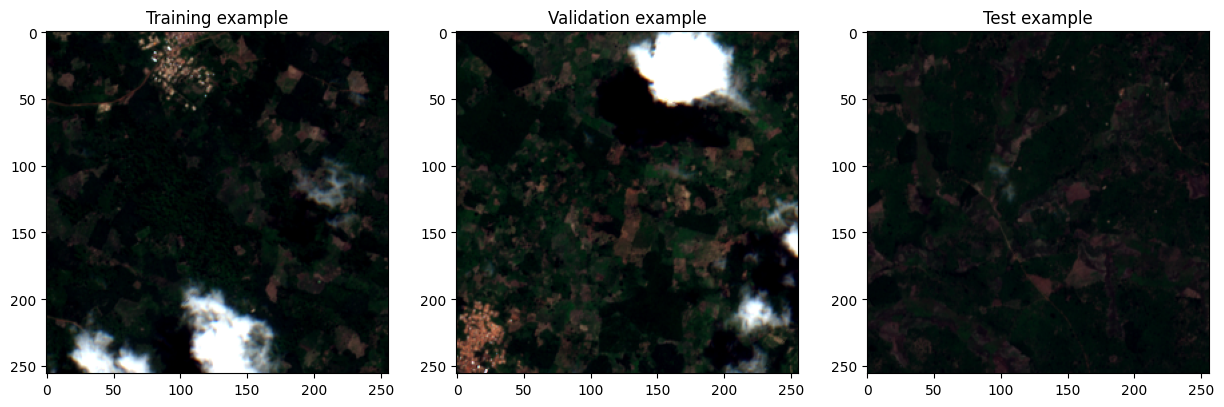

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3, figsize=(15,10))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(X_train[-1][:,:,:3])
axarr[0].set_title('Training example')
axarr[1].imshow(X_val[-1][:,:,:3])
axarr[1].set_title('Validation example')
axarr[2].imshow(X_test[-1][:,:,:3])
axarr[2].set_title('Test example')
plt.show()

# X_train[0].plot.imshow()

<Figure size 640x480 with 0 Axes>

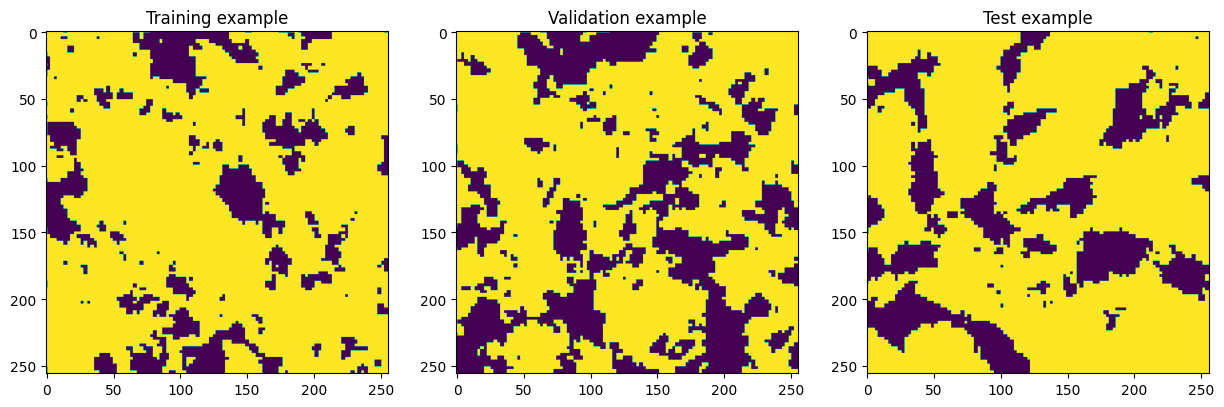

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3, figsize=(15,10))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(y_train[-1])
axarr[0].set_title('Training example')
axarr[1].imshow(y_val[-1])
axarr[1].set_title('Validation example')
axarr[2].imshow(y_test[-1])
axarr[2].set_title('Test example')
plt.show()


In [ ]:
print(X_train[0].shape)
print(y_train[0].shape)

(256, 256, 4)
(256, 256, 1)


In [ ]:
# TensorFlow validation set
X_val_images = np.stack(X_val)
y_val_images = np.stack(y_val)
validation_df = tf.data.Dataset.from_tensor_slices((X_val_images,y_val_images))

## **ANALYSIS ON FNF DATASET**

In [ ]:
# TRAINING F/NF PIXELS
train_f_pixels = 0
train_nf_pixels = 0

for i in range(len(y_train)):
  train_f_pixels = train_f_pixels + y_train[i].where(y_train[i] == 1).count()
  train_nf_pixels = train_nf_pixels + y_train[i].where(y_train[i] < 1).count()

train_total_pixels = train_f_pixels + train_nf_pixels
print(f"Training - F Pixles: {train_f_pixels/train_total_pixels} - NF Pixels: {train_nf_pixels/train_total_pixels}")


# VALIDATION F/NF PIXELS
val_f_pixels = 0
val_nf_pixels = 0

for i in range(len(y_val)):
  val_f_pixels = val_f_pixels + y_val[i].where(y_val[i] == 1).count()
  val_nf_pixels = val_nf_pixels + y_val[i].where(y_val[i] < 1).count()

val_total_pixels = val_f_pixels + val_nf_pixels
print(f"Validation - F Pixles: {val_f_pixels/val_total_pixels} - NF Pixels: {val_nf_pixels/val_total_pixels}")

# TEST F/NF PIXELS
test_f_pixels = 0
test_nf_pixels = 0

for i in range(len(y_test)):
  test_f_pixels = test_f_pixels + y_test[i].where(y_test[i] == 1).count()
  test_nf_pixels = test_nf_pixels + y_test[i].where(y_test[i] < 1).count()

test_total_pixels = test_f_pixels + test_nf_pixels
print(f"Test - F Pixles: {test_f_pixels/test_total_pixels} - NF Pixels: {test_nf_pixels/test_total_pixels}")

Training - F Pixles: <xarray.DataArray ()>
array(0.82676119) - NF Pixels: <xarray.DataArray ()>
array(0.17323881)
Validation - F Pixles: <xarray.DataArray ()>
array(0.8238795) - NF Pixels: <xarray.DataArray ()>
array(0.1761205)
Test - F Pixles: <xarray.DataArray ()>
array(0.81256704) - NF Pixels: <xarray.DataArray ()>
array(0.18743296)


## **ANALYSIS ON CLOUD**

In [ ]:
# training set creation

# cloud_pixels = 0
# no_cloud_pixels = 0

# for img_name in X_train_list:
#   img_xarr = xarray.open_rasterio(f"{dataset_sent_cloud_dir}/{img_name}")
#   img_xarr_t = img_xarr.transpose('y','x','band')
#   img_xarr_t = img_xarr_t > 90
#   cloud_pixels = cloud_pixels + img_xarr_t.where(img_xarr_t == 1).count()
#   no_cloud_pixels = no_cloud_pixels + img_xarr_t.where(img_xarr_t < 1).count()

# total_pixels = cloud_pixels + no_cloud_pixels
# print(f"Training set - Cloud Pixels: {cloud_pixels/total_pixels} - No Cloud Pixels: {no_cloud_pixels/total_pixels}")

## **DATA AUGMENTATION  (SENTINEL2)**

In [ ]:
def trainGenerator(batch_size,
                   image_array,
                   mask_array,
                   weights_array,
                   aug_dict,
                   image_save_prefix  = "image",
                   mask_save_prefix  = "label",
                   weight_save_prefix  = "weight",
                   num_class = 2,
                   save_to_dir = None,
                   target_size = (512,512),
                   seed = 1):

    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    weight_datagen = ImageDataGenerator(**aug_dict)

    image_generator = image_datagen.flow(image_array,
                                           batch_size = batch_size,
                                           save_to_dir = save_to_dir,
                                           save_prefix = image_save_prefix,
                                           seed = seed)

    mask_generator = mask_datagen.flow(mask_array,
                                           batch_size = batch_size,
                                           save_to_dir = save_to_dir,
                                           save_prefix = mask_save_prefix,
                                           seed = seed)

    weight_generator = weight_datagen.flow(weights_array,
                                           batch_size = batch_size,
                                           save_to_dir = save_to_dir,
                                           save_prefix = weight_save_prefix,
                                           seed = seed)

    train_generator = zip(image_generator, mask_generator, weight_generator)

    for (img,mask,weight) in train_generator:
        yield (img, mask,weight)

In [ ]:
#
# Produce generators for training images
#
X_train_images = np.stack(X_train)
y_train_images = np.stack(y_train)
w_train_images = np.stack(w_train)

# Set parameters for data augmentation
data_gen_args = dict(rotation_range=180,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    vertical_flip = True,
                    fill_mode='reflect',
                    )

# train = trainGenerator(1, training_images, labels_images, data_gen_args, save_to_dir=None)

## CREATE MODELS (SENTINEL2)

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.losses import *
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam_v2 # not used

In [ ]:
########################### UNET ###########################
'''
  Convolutional block with set parameters and activation layer after
'''

def convBlock(input, filters, kernel, kernel_init='he_normal', act='relu', transpose=False):
  if transpose == False:
    #conv = ZeroPadding2D((1,1))(input)
    conv = Conv2D(filters, kernel, padding = 'same', kernel_initializer = kernel_init)(input)
  else:
    #conv = ZeroPadding2D((1,1))(input)
    conv = Conv2DTranspose(filters, kernel, padding = 'same', kernel_initializer = kernel_init)(input)

  conv = Activation(act)(conv)
  return conv

'''
  U-Net model
'''

def UNet(trained_weights = None, input_size = (512,512,4), drop_rate = 0.25, lr=0.0001):

    ## Can add pretrained weights by specifying 'trained_weights'

    # Input layer
    # inputs = Input(input_size, batch_size=1)
    inputs = Input(input_size)

    ## Contraction phase
    conv1 = convBlock(inputs, 64, 3)
    conv1 = convBlock(conv1, 64, 3)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = convBlock(pool1, 128, 3)
    conv2 = convBlock(conv2, 128, 3)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    #drop2 = Dropout(drop_rate)(pool2)

    conv3 = convBlock(pool2, 256, 3)
    conv3 = convBlock(conv3, 256, 3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    #drop3 = Dropout(drop_rate)(pool3)

    conv4 = convBlock(pool3, 512, 3)
    conv4 = convBlock(conv4, 512, 3)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    #drop4 = Dropout(drop_rate)(pool4)

    conv5 = convBlock(pool4, 1024, 3)
    conv5 = convBlock(conv5, 1024, 3)

    ## Expansion phase
    up6 = (Conv2DTranspose(512, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv5))
    merge6 = concatenate([conv4,up6])
    conv6 = convBlock(merge6, 512, 3)
    conv6 = convBlock(conv6, 512, 3)
    #conv6 = Dropout(drop_rate)(conv6)

    up7 = (Conv2DTranspose(256, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv6))
    merge7 = concatenate([conv3,up7])
    conv7 = convBlock(merge7, 256, 3)
    conv7 = convBlock(conv7, 256, 3)
    #conv7 = Dropout(drop_rate)(conv7)

    up8 = (Conv2DTranspose(128, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv7))
    merge8 = concatenate([conv2,up8])
    conv8 = convBlock(merge8, 128, 3)
    conv8 = convBlock(conv8, 128, 3)
    #conv8 = Dropout(drop_rate)(conv8)

    up9 = (Conv2DTranspose(64, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv8))
    merge9 = concatenate([conv1,up9])
    conv9 = convBlock(merge9, 64, 3)
    conv9 = convBlock(conv9, 64, 3)

    # Output layer
    conv10 = convBlock(conv9, 1, 1, act='sigmoid')
    # Output layer beta

    model = Model(inputs, conv10)

    model.compile(optimizer = adam_v2.Adam(learning_rate = lr), loss = 'binary_crossentropy', metrics = metrics_list)

    if trained_weights != None:
    	model.load_weights(trained_weights)

    return model

In [ ]:
# create resnet, unet, etc...

In [ ]:
'''
  Convolutional block with two conv layers and two activation layers
'''

def convBlock2(input, filters, kernel, kernel_init='he_normal', act='relu', transpose=False):
  if transpose == False:
    conv = Conv2D(filters, kernel, padding = 'same', kernel_initializer = kernel_init)(input)
    conv = Activation(act)(conv)
    conv = Conv2D(filters, kernel, padding = 'same', kernel_initializer = kernel_init)(conv)
    conv = Activation(act)(conv)
  else:
    conv = Conv2DTranspose(filters, kernel, padding = 'same', kernel_initializer = kernel_init)(input)
    conv = Activation(act)(conv)
    conv = Conv2DTranspose(filters, kernel, padding = 'same', kernel_initializer = kernel_init)(conv)
    conv = Activation(act)(conv)

  return conv

'''
  Attention block/mechanism
'''
def attention_block(x, gating, inter_shape, drop_rate=0.25):

    # Find shape of inputs
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

    ## Process x vector and gating signal
    # x vector input and processing
    theta_x = Conv2D(inter_shape, kernel_size = 1, strides = 1, padding='same', kernel_initializer='he_normal', activation=None)(x)
    theta_x = MaxPooling2D((2,2))(theta_x)
    shape_theta_x = K.int_shape(theta_x)

    # gating signal ""
    phi_g = Conv2D(inter_shape, kernel_size = 1, strides = 1, padding='same', kernel_initializer='he_normal', activation=None)(gating)
    shape_phi_g = K.int_shape(phi_g)

    # Add components
    concat_xg = add([phi_g, theta_x])
    act_xg = Activation('relu')(concat_xg)

    # Apply convolution
    psi = Conv2D(1, kernel_size = 1, strides = 1, padding='same', kernel_initializer='he_normal', activation=None)(act_xg)

    # Apply sigmoid activation
    sigmoid_xg = Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)

    # UpSample and resample to correct size
    upsample_psi = UpSampling2D(interpolation='bilinear', size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)
    upsample_psi = tf.broadcast_to(upsample_psi, shape=shape_x)
    y = multiply([upsample_psi, x])

    return y


'''
  Attention U-Net model
'''

def UNetAM(trained_weights = None, input_size = (512,512,4), drop_rate = 0.25, lr=0.0001, filter_base=16):

    ## Can add pretrained weights by specifying 'trained_weights'

    # Input layer
    inputs = Input(input_size, batch_size=1)

    ## Contraction phase
    conv = convBlock2(inputs, filter_base, 3)
    #conv0 = Dropout(drop_rate)(conv0)

    conv0 = MaxPooling2D(pool_size=(2, 2))(conv)
    conv0 = convBlock2(conv0, 2 * filter_base, 3)

    pool0 = MaxPooling2D(pool_size=(2, 2))(conv0)
    conv1 = convBlock2(pool0, 4 * filter_base, 3)
    #conv1 = Dropout(drop_rate)(conv1)

    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = convBlock2(pool1, 8 * filter_base, 3)
    #conv2 = Dropout(drop_rate)(conv2)

    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = convBlock2(pool2, 16 * filter_base, 3)
    #conv3 = Dropout(drop_rate)(conv3)

    ## Expansion phase
    up4 = (Conv2DTranspose(8 * filter_base, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv3))
    merge4 = attention_block(conv2, conv3, 8 * filter_base, drop_rate) # Attention gate
    conv4 = concatenate([up4, merge4])
    conv4 = convBlock2(conv4, 8 * filter_base, 3)

    up5 = (Conv2DTranspose(4 * filter_base, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv4))
    merge5 = attention_block(conv1, conv4, 4 * filter_base, drop_rate) # Attention gate
    conv5 = concatenate([up5, merge5])
    conv5 = convBlock2(conv5, 4 * filter_base, 3)

    up6 = (Conv2DTranspose(2 * filter_base, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv5))
    merge6 = attention_block(conv0, conv5, 2 * filter_base, drop_rate) # Attention gate
    conv6 = concatenate([up6, merge6])
    conv6 = convBlock2(conv6, 2 * filter_base, 3)

    up7 = (Conv2DTranspose(1 * filter_base, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv6))
    merge7 = attention_block(conv, conv6, 1 * filter_base, drop_rate) # Attention gate
    conv7 = concatenate([up7, merge7])
    conv7 = concatenate([up7, conv])
    conv7 = convBlock2(conv7, 1 * filter_base, 3)

    ## Output layer
    out = convBlock(conv7, 1, 1, act='sigmoid')

    model = Model(inputs, out)

    model.compile(optimizer = adam_v2.Adam(learning_rate = lr), loss = binary_crossentropy, metrics = metrics_list)

    if trained_weights != None:
    	model.load_weights(trained_weights)

    return model

In [ ]:
# Forked code from: https://github.com/ykamikawa/tf-keras-SegNet

from keras.layers import Layer

'''
  Unpooling using max pooling indices
'''

class MaxPoolingWithArgmax2D(Layer):
    def __init__(self, pool_size=(2, 2), strides=(2, 2), padding="same", **kwargs):
        super(MaxPoolingWithArgmax2D, self).__init__(**kwargs)

    def call(self, inputs, **kwargs):
        padding = 'same'
        pool_size = (2,2)
        strides = (2,2)
        if K.backend() == "tensorflow":
            ksize = [1, pool_size[0], pool_size[1], 1]
            padding = padding.upper()
            strides = [1, strides[0], strides[1], 1]
            output, argmax = K.tf.nn.max_pool_with_argmax(
                inputs, ksize=ksize, strides=strides, padding=padding
            )
        else:
            errmsg = "{} backend is not supported for layer {}".format(
                K.backend(), type(self).__name__
            )
            raise NotImplementedError(errmsg)
        argmax = K.cast(argmax, K.floatx())
        return [output, argmax]

class MaxUnpooling2D(Layer):
    def __init__(self, size=(2, 2), **kwargs):
        super(MaxUnpooling2D, self).__init__(**kwargs)
        self.size = size

    def call(self, inputs, output_shape=None):
        updates, mask = inputs[0], inputs[1]
        with tf.compat.v1.variable_scope(self.name):
            mask = K.cast(mask, "int32")
            input_shape = K.tf.shape(updates, out_type="int32")
            #  calculation new shape
            if output_shape is None:
                output_shape = (
                    input_shape[0],
                    input_shape[1] * self.size[0],
                    input_shape[2] * self.size[1],
                    input_shape[3],
                )
            self.output_shape1 = output_shape

            # calculation indices for batch, height, width and feature maps
            one_like_mask = K.ones_like(mask, dtype="int32")
            batch_shape = K.concatenate([[input_shape[0]], [1], [1], [1]], axis=0)
            batch_range = K.reshape(
                K.tf.range(output_shape[0], dtype="int32"), shape=batch_shape
            )
            b = one_like_mask * batch_range
            y = mask // (output_shape[2] * output_shape[3])
            x = (mask // output_shape[3]) % output_shape[2]
            feature_range = K.tf.range(output_shape[3], dtype="int32")
            f = one_like_mask * feature_range

            # transpose indices & reshape update values to one dimension
            updates_size = K.tf.size(updates)
            indices = K.transpose(K.reshape(K.stack([b, y, x, f]), [4, updates_size]))
            values = K.reshape(updates, [updates_size])
            ret = K.tf.scatter_nd(indices, values, output_shape)
            return ret

    def compute_output_shape(self, input_shape):
        mask_shape = input_shape[1]
        return (
            mask_shape[0],
            mask_shape[1] * self.size[0],
            mask_shape[2] * self.size[1],
            mask_shape[3],
        )

# Custom version of MaxUnpooling2D
# Takes raw layer values and outputs values
# Takes tf.nn.max_pool_with_argmax output as input
def unpool_with_indices(pool, indices, out_size=2):
  print(pool)
  print(indices)
  # Create empty array of appropriate size
  shape = np.array(np.shape(pool))
  shape = np.array((shape[0], out_size * shape[1], out_size * shape[2], shape[3]))
  out = np.zeros(shape)

  # Make upsample
  inds = np.array(indices).flatten()
  outs = np.array(pool).flatten()
  for i in range(len(inds)):
    blk = inds[i] // (shape[2] * shape[3]) # Find which block to place numbers in
    ln  = inds[i] - (blk * shape[3] * shape[2]) # Find which line
    ln2 = ln // (shape[3]) # Find line
    pos = ln % (shape[3]) # Find position
    #print(blk, ln2, pos)
    out[0][blk][ln2][pos] = outs[i]


  #print(out.shape)
  return (out)

# Own custom code
'''
  ResNet Contraction Phase Block
'''

def resnetConvDownBlock(x, filter, kernel, act='relu'):
  # Convolutional Block for encoding phase
  for i in range(3):
    x = ZeroPadding2D((1,1))(x)
    x = Conv2D(filters = filter, kernel_size = kernel, kernel_initializer = 'he_normal')(x)
    x = Activation('relu')(x)

  return x

'''
  SegNet Expansion Phase Block
'''
def resnetConvUpBlock(x, skip_connection = None, filter = None, kernel = None, act='relu'):
  # Convolutional block for decoding phase

  out = x

  # Unpooling
  out = UpSampling2D((2,2))(out)

  # Conv Block
  for i in range(3):
    out = ZeroPadding2D((1,1))(out)
    out = Conv2D(filters = filter, kernel_size = kernel, kernel_initializer = 'he_normal')(out)
    out = Activation('relu')(out)

  # Implement skip connection
  if skip_connection != None:
    out = Add()([out, skip_connection])

  return out

def ResNet50SegNet(input_size=(512,512,4), lr = 0.0001, filters = 64, kernel_sz = 3):

  inputs = Input(input_size)

  # Encoder
  # Conv, Conv, Conv, MaxPool #1
  block1 = resnetConvDownBlock(inputs, filter = filters, kernel = kernel_sz)
  pool1, mask1 = MaxPoolingWithArgmax2D((2,2))(block1)
  # Conv, Conv, Conv, MaxPool #2
  block2 = resnetConvDownBlock(pool1, filter = 2 * filters, kernel = kernel_sz)
  pool2, mask2 = MaxPoolingWithArgmax2D((2,2))(block2)
  # Conv, Conv, Conv, MaxPool #3
  block3 = resnetConvDownBlock(pool2, filter = 4 * filters, kernel = kernel_sz)
  pool3, mask3 = MaxPoolingWithArgmax2D((2,2))(block3)
  # Conv, Conv, Conv, MaxPool #4
  block4 = resnetConvDownBlock(pool3, filter = 8 * filters, kernel = kernel_sz)
  pool4, mask4 = MaxPoolingWithArgmax2D((2,2))(block4)
  # Conv, Conv, Conv, MaxPool #5
  block5 = resnetConvDownBlock(pool4, filter = 16 * filters, kernel = kernel_sz)
  pool5, mask5 = MaxPoolingWithArgmax2D((2,2))(block5)

  # Decoder
  # ConvTranspose + Concat, Conv, Conv, Conv #1
  block5_ = resnetConvUpBlock(pool5, filter = 16 * filters, kernel = kernel_sz)
  # ConvTranspose + Concat, Conv, Conv, Conv #2
  block4_ = resnetConvUpBlock(block5_, skip_connection = MaxUnpooling2D((2,2))([pool4, mask4]), filter = 8 * filters, kernel = kernel_sz)
  # ConvTranspose + Concat, Conv, Conv, Conv #3
  block3_ = resnetConvUpBlock(block4_, skip_connection = MaxUnpooling2D((2,2))([pool3, mask3]), filter = 4 * filters, kernel = kernel_sz)
  # ConvTranspose + Concat, Conv, Conv, Conv #4
  block2_ = resnetConvUpBlock(block3_, skip_connection = MaxUnpooling2D((2,2))([pool2, mask2]), filter = 2 * filters, kernel = kernel_sz)
  # ConvTranspose + Concat, Conv, Conv, Conv #5
  block1_ = resnetConvUpBlock(block2_, skip_connection = MaxUnpooling2D((2,2))([pool1, mask1]), filter = filters, kernel = kernel_sz)

  # Output
  outputs = Conv2D(1, kernel_size = 1, strides = 1, kernel_initializer = 'he_normal')(block1_)
  outputs = Activation('sigmoid')(outputs)

  model = Model(inputs, outputs)
  model.compile(optimizer = adam_v2.Adam(learning_rate = lr), loss = binary_crossentropy, metrics = metrics_list)

  return model

In [ ]:
# Code forked and modified from: https://github.com/divamgupta/image-segmentation-keras

'''
  FCN32-VGG16 model
'''

def fcn_32(input_size = (256,256,4), lr = 0.0001, drop_rate = 0):

    kernel = 3
    filter_size = 64
    pad = 1
    pool_size = 2

    IMAGE_ORDERING = 'channels_last'
    # Input
    inputs = Input(shape=input_size)

    x = inputs
    levels = []

    ## Encoder
    # Block 1
    x = Conv2D(64, (3, 3), padding='same',
               name='block1_conv1', data_format=IMAGE_ORDERING)(inputs)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same',
               name='block1_conv2', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool',
                     data_format=IMAGE_ORDERING)(x)
    levels.append(x)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same',
               name='block2_conv1', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same',
               name='block2_conv2', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool',
                     data_format=IMAGE_ORDERING)(x)
    levels.append(x)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same',
               name='block3_conv1', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same',
               name='block3_conv2', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same',
               name='block3_conv3', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool',
                     data_format=IMAGE_ORDERING)(x)
    levels.append(x)

    # Block 4
    x = Conv2D(512, (3, 3), padding='same',
               name='block4_conv1', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same',
               name='block4_conv2', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same',
               name='block4_conv3', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool',
                     data_format=IMAGE_ORDERING)(x)
    levels.append(x)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same',
               name='block5_conv1', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same',
               name='block5_conv2', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same',
               name='block5_conv3', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool',
                     data_format=IMAGE_ORDERING)(x)

    levels.append(x)

    [f1, f2, f3, f4, f5] = levels

    o = f5

    # Decoder
    o = (Conv2D(4096, (7 , 7 ), padding = 'same', kernel_initializer = 'he_normal', name = "conv6"))(o)
    o = Activation('relu')(o)
    o = Dropout(drop_rate)(o)
    o = (Conv2D(4096, (1 , 1 ), padding = 'same', kernel_initializer = 'he_normal', name = "conv7"))(o)
    o = Activation('relu')(o)
    o = Dropout(drop_rate)(o)

    o = (Conv2D(1, 1, padding='same', kernel_initializer='he_normal', name="scorer1"))(o)
    o = Conv2DTranspose(1, kernel_size=(64,64), padding='same', strides=(32,32), name="Upsample32")(o)
    o = (Conv2D(1, 1, padding='same', kernel_initializer='he_normal', name="output"))(o)

    # Output
    o = Activation('sigmoid')(o)

    model = Model(inputs, o)
    model.compile(optimizer = adam_v2.Adam(learning_rate = lr), loss = binary_crossentropy, metrics = metrics_list)
    model.model_name = "fcn_32"
    return model

## TRAINING UNET (SENTINEL2)

In [ ]:
# UNET
# Train U-Net with generator
model_unet = UNet(input_size=(256,256,4), lr=0.0001)
model_unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  2368        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 256, 256, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
save_model = ModelCheckpoint(f'{result_dir}/{unet_sent2_model_name}', monitor='val_loss',verbose=1, save_best_only=True)
train = trainGenerator(1, X_train_images, y_train_images, w_train_images, data_gen_args, save_to_dir=None)
model_unet.fit(train, steps_per_epoch=100, epochs=30, validation_data = (X_val_images, y_val_images), callbacks=[save_model])

Epoch 1/30
 99/100 [============================>.] - ETA: 0s - loss: 0.2060 - true_positives_1: 5565454.0000 - true_negatives_1: 3631.0000 - precision_1: 0.8626 - recall_1: 0.9942 - false_negatives_1: 32427.0000 - false_positives_1: 886552.0000 - binary_io_u_1: 0.4088 - io_u_1: 0.0912 - binary_accuracy: 0.8134 - mean_squared_error: 0.1174
Epoch 1: val_loss improved from inf to 0.37385, saving model to /gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/results/dataset_02_mean/test_3_p1_p99/unet-sent2.hdf5
100/100 [==============================] - 26s 174ms/step - loss: 0.2053 - true_positives_1: 5625150.0000 - true_negatives_1: 4062.0000 - precision_1: 0.8632 - recall_1: 0.9942 - false_negatives_1: 32853.0000 - false_positives_1: 891535.0000 - binary_io_u_1: 0.4094 - io_u_1: 0.0908 - binary_accuracy: 0.8142 - mean_squared_error: 0.1169 - val_loss: 0.3739 - val_true_positives_1: 8072107.0000 - val_true_negatives_1: 95018.0000 - val_precision_1: 0.8315 - val

In [ ]:
# Save model training history
np.save(f'{result_dir}/{unet_sent2_history}', model_unet.history.history)

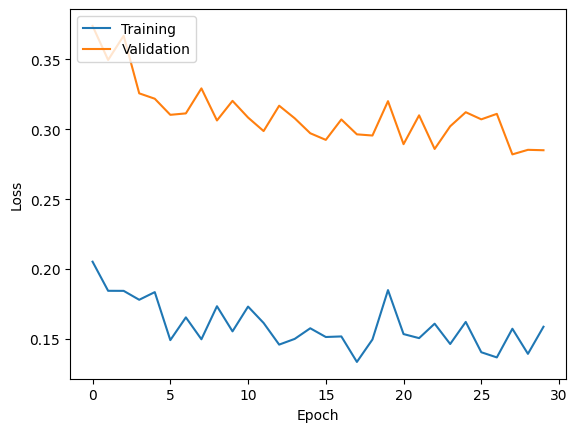

In [ ]:
# Plot accuracy and loss

## Accuracy
# plt.plot(model_unet.history.history['accuracy'])
# plt.plot(model_unet.history.history['val_accuracy'])
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
# plt.show()
# plt.savefig(f"{result_dir}/unet-3d-sent2-accuracy.png")

## Loss
plt.plot(model_unet.history.history['loss'])
plt.plot(model_unet.history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.savefig(f"{result_dir}/unet-3d-sent2-loss.png")


1/1 [==============================] - 0s 320ms/step


<Figure size 640x480 with 0 Axes>

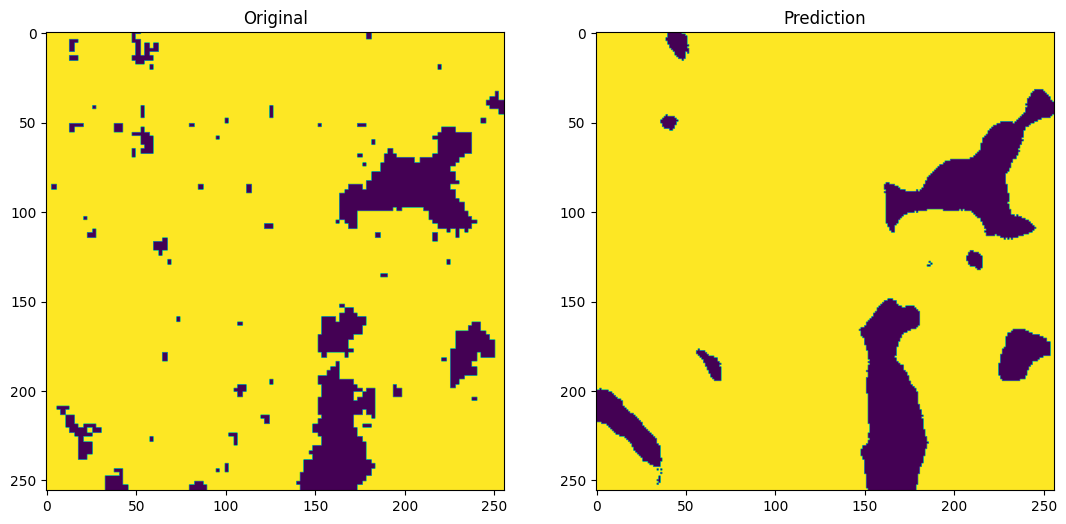

In [ ]:
# Predicting one image
predicted_image = model_unet.predict(X_train_images[0].reshape(1,256,256,4)) > 0.5

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2, figsize=(13,10))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(y_train_images[0])
axarr[0].set_title('Original')
axarr[1].imshow(predicted_image[0])
axarr[1].set_title('Prediction')
plt.show()

## TRAINING ATTENTION UNET (SENTINEL2)

In [ ]:
# UNET
# Train U-Net with generator
model_am_unet = UNetAM(input_size=(256,256,4), lr=0.0001)
model_am_unet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(1, 256, 256, 4)]   0           []                               
                                                                                                  
 conv2d_19 (Conv2D)             (1, 256, 256, 16)    592         ['input_2[0][0]']                
                                                                                                  
 activation_19 (Activation)     (1, 256, 256, 16)    0           ['conv2d_19[0][0]']              
                                                                                                  
 conv2d_20 (Conv2D)             (1, 256, 256, 16)    2320        ['activation_19[0][0]']          
                                                                                            

In [ ]:
save_model = ModelCheckpoint(f'{result_dir}/{am_unet_sent2_model_name}', monitor='val_loss',verbose=1, save_best_only=True)
train = trainGenerator(1, X_train_images, y_train_images, w_train_images, data_gen_args, save_to_dir=None)
model_am_unet.fit(train, batch_size=1, steps_per_epoch=100, epochs=30, validation_data = (X_val_images, y_val_images), callbacks=[save_model])

Epoch 1/30
 99/100 [============================>.] - ETA: 0s - loss: 0.2602 - true_positives_1: 12766436.0000 - true_negatives_1: 1117958.0000 - precision_1: 0.8946 - recall_1: 0.9321 - false_negatives_1: 930510.0000 - false_positives_1: 1503560.0000 - binary_io_u_1: 0.5613 - io_u_1: 0.0893 - binary_accuracy: 0.8344 - mean_squared_error: 0.1572
Epoch 1: val_loss improved from inf to 0.43392, saving model to /gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/results/dataset_02_mean/test_3_p1_p99/am-unet-sent2.hdf5
100/100 [==============================] - 10s 54ms/step - loss: 0.2593 - true_positives_1: 12826365.0000 - true_negatives_1: 1117996.0000 - precision_1: 0.8947 - recall_1: 0.9323 - false_negatives_1: 930703.0000 - false_positives_1: 1508936.0000 - binary_io_u_1: 0.5611 - io_u_1: 0.0892 - binary_accuracy: 0.8346 - mean_squared_error: 0.1566 - val_loss: 0.4339 - val_true_positives_1: 8074892.0000 - val_true_negatives_1: 8149.0000 - val_precision_1:

In [ ]:
# Save model training history
np.save(f'{result_dir}/{am_unet_sent2_history}', model_am_unet.history.history)

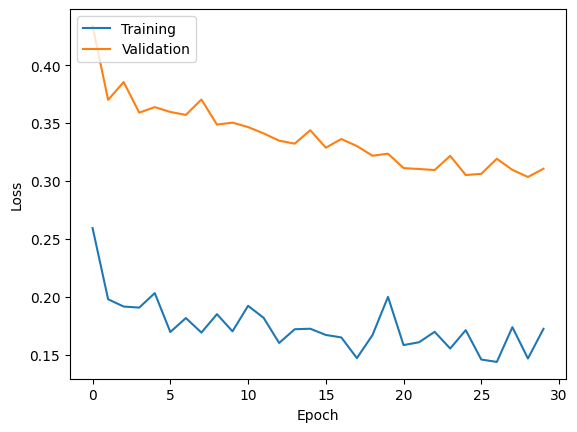

In [ ]:
# Plot accuracy and loss

## Accuracy
# plt.plot(model_am_unet.history.history['accuracy'])
# plt.plot(model_am_unet.history.history['val_accuracy'])
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
# plt.show()
# plt.savefig(f"{result_dir}/am-unet-3d-sent2-accuracy.png")

## Loss
plt.plot(model_am_unet.history.history['loss'])
plt.plot(model_am_unet.history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.savefig(f"{result_dir}/am-unet-3d-sent2-loss.png")

## TRAINING ResNet50SegNet

In [ ]:
# ResNet50SegNet
# Train ResNet50SegNet with generator
model_resnet50segnet = ResNet50SegNet(input_size=(256,256,4), lr=0.0001)
model_resnet50segnet.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 4  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 258, 258, 4)  0          ['input_3[0][0]']                
                                                                                                  
 conv2d_50 (Conv2D)             (None, 256, 256, 64  2368        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
save_model = ModelCheckpoint(f'{result_dir}/{resnet50segnet_sent2_model_name}', monitor='val_loss',verbose=1, save_best_only=True)
train = trainGenerator(1, X_train_images, y_train_images, w_train_images, data_gen_args, save_to_dir=None)
model_resnet50segnet.fit(train, batch_size = 1, steps_per_epoch=100, epochs=30, validation_data = (X_val_images, y_val_images), callbacks=[save_model])

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.2617 - true_positives_1: 13116271.0000 - true_negatives_1: 973462.0000 - precision_1: 0.8881 - recall_1: 0.9534 - false_negatives_1: 640797.0000 - false_positives_1: 1653470.0000 - binary_io_u_1: 0.5551 - io_u_1: 0.0898 - binary_accuracy: 0.8426 - mean_squared_error: 0.1565
Epoch 1: val_loss improved from inf to 0.49441, saving model to /gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/results/dataset_02_mean/test_3_p1_p99/resnet50segnet-sent2.hdf5
100/100 [==============================] - 21s 151ms/step - loss: 0.2617 - true_positives_1: 13116271.0000 - true_negatives_1: 973462.0000 - precision_1: 0.8881 - recall_1: 0.9534 - false_negatives_1: 640797.0000 - false_positives_1: 1653470.0000 - binary_io_u_1: 0.5551 - io_u_1: 0.0898 - binary_accuracy: 0.8426 - mean_squared_error: 0.1565 - val_loss: 0.4944 - val_true_positives_1: 8093357.0000 - val_true_negatives_1: 2227.0000 - val_precis

In [ ]:
# Save model training history
np.save(f'{result_dir}/{resnet50segnet_sent2_history}', model_resnet50segnet.history.history)

## TRAINING FCN32-VGG16

In [ ]:
# ResNet50SegNet
model_fcn_32 = fcn_32(lr = 0.0001)
model_fcn_32.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 4)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      2368      
                                                                 
 activation_77 (Activation)  (None, 256, 256, 64)      0         
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 activation_78 (Activation)  (None, 256, 256, 64)      0         
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     7385

In [ ]:
save_model_fcn32 = ModelCheckpoint(f'{result_dir}/{fcn32_sent2_model_name}', monitor='val_loss',verbose=1, save_best_only=True)
train = trainGenerator(1, X_train_images, y_train_images, w_train_images, data_gen_args, save_to_dir=None)
model_fcn_32.fit(train, batch_size = 1, steps_per_epoch=100, epochs=30, validation_data = (X_val_images, y_val_images), callbacks=[save_model_fcn32])

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.3316 - true_positives_1: 12213495.0000 - true_negatives_1: 1231428.0000 - precision_1: 0.8975 - recall_1: 0.8878 - false_negatives_1: 1543573.0000 - false_positives_1: 1395504.0000 - binary_io_u_1: 0.5434 - io_u_1: 0.0892 - binary_accuracy: 0.8063 - mean_squared_error: 0.2274
Epoch 1: val_loss improved from inf to 0.66509, saving model to /gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/results/dataset_02_mean/test_3_p1_p99/fcn32-sent2.hdf5
100/100 [==============================] - 23s 207ms/step - loss: 0.3316 - true_positives_1: 12213495.0000 - true_negatives_1: 1231428.0000 - precision_1: 0.8975 - recall_1: 0.8878 - false_negatives_1: 1543573.0000 - false_positives_1: 1395504.0000 - binary_io_u_1: 0.5434 - io_u_1: 0.0892 - binary_accuracy: 0.8063 - mean_squared_error: 0.2274 - val_loss: 0.6651 - val_true_positives_1: 7180531.0000 - val_true_negatives_1: 195711.0000 - val_precision

In [ ]:
# Save model training history
np.save(f'{result_dir}/{fcn32_sent2_history}', model_fcn_32.history.history)

## TEST SET ANALYSIS (SENTINEL 2)

In [ ]:
from sklearn.metrics import *

def compute_accuracy(model, images, labels):
  accuracy_list = []
  for i in range(len(images)):
    y_hat = model.predict(images[i].reshape(1,256,256,4)) > 0.5
    y_hat = np.round(y_hat).flatten()
    acc = accuracy_score(labels[i].flatten(), y_hat)
    accuracy_list.append(acc)
  return np.mean(accuracy_list)

def compute_precision(model, images, labels):
  precision_list = []
  for i in range(len(images)):
    y_hat = model.predict(images[i].reshape(1,256,256,4)) > 0.5
    y_hat = np.round(y_hat).flatten()
    acc = precision_score(labels[i].flatten(), y_hat, average='binary')
    precision_list.append(acc)
  return np.mean(precision_list)

def compute_recall(model, images, labels):
  recall_list = []
  for i in range(len(images)):
    y_hat = model.predict(images[i].reshape(1,256,256,4)) > 0.5
    y_hat = np.round(y_hat).flatten()
    acc = recall_score(labels[i].flatten(), y_hat, average='binary')
    recall_list.append(acc)
  return np.mean(recall_list)

def compute_f1_score(model, images, labels):
  recall_list = []
  for i in range(len(images)):
    y_hat = model.predict(images[i].reshape(1,256,256,4)) > 0.5
    y_hat = np.round(y_hat).flatten()
    acc = f1_score(labels[i].flatten(), y_hat)
    recall_list.append(acc)
  return np.mean(recall_list)

In [ ]:
# load models
unet = load_model(f'{result_dir}/{unet_sent2_model_name}', compile=False)
attention_unet = load_model(f'{result_dir}/{am_unet_sent2_model_name}', compile=False)
resnet_segnet = ResNet50SegNet(input_size=(256,256,4))
resnet_segnet.load_weights(f'{result_dir}/{resnet50segnet_sent2_model_name}')
fcn32 = load_model(f'{result_dir}/{fcn32_sent2_model_name}', compile=False)

In [ ]:
# Load dataset again!?
X_test_images = np.stack(X_test)
y_test_images = np.stack(y_test)

In [ ]:
# calculate accuracy
unet_accuracy = compute_accuracy(unet, X_test_images, y_test_images)
unet_precision = compute_precision(unet, X_test_images, y_test_images)
unet_recall = compute_recall(unet, X_test_images, y_test_images)
unet_f1_score = compute_f1_score(unet, X_test_images, y_test_images)
print(f"UNet --> accuracy: {unet_accuracy} - precision: {unet_precision} - recall: {unet_recall} - f1 score: {unet_f1_score}")

1/1 [==============================] - 0s 25ms/step
UNet --> accuracy: 0.8905026245117188 - precision: 0.8968522949983719 - recall: 0.9619861077664458 - f1 score: 0.9253106574303206


In [ ]:
am_unet_accuracy = compute_accuracy(attention_unet, X_test_images, y_test_images)
am_unet_precision = compute_precision(attention_unet, X_test_images, y_test_images)
am_unet_recall = compute_recall(attention_unet, X_test_images, y_test_images)
am_unet_f1_score = compute_f1_score(attention_unet, X_test_images, y_test_images)
print(f"AM-UNet --> accuracy: {am_unet_accuracy} - precision: {am_unet_precision} - recall: {am_unet_recall} - f1 score: {am_unet_f1_score}")

1/1 [==============================] - 0s 26ms/step
AM-UNet --> accuracy: 0.8791339111328125 - precision: 0.8883171696105179 - recall: 0.9584422159628104 - f1 score: 0.918052459511248


In [ ]:
resnet_segnet_accuracy = compute_accuracy(resnet_segnet, X_test_images, y_test_images)
resnet_segnet_precision = compute_precision(resnet_segnet, X_test_images, y_test_images)
resnet_segnet_recall = compute_recall(resnet_segnet, X_test_images, y_test_images)
resnet_segnet_f1_score = compute_f1_score(resnet_segnet, X_test_images, y_test_images)
print(f"FCN32 --> accuracy: {resnet_segnet_accuracy} - precision: {resnet_segnet_precision} - recall: {resnet_segnet_recall} - f1 score: {resnet_segnet_f1_score}")

1/1 [==============================] - 0s 43ms/step
FCN32 --> accuracy: 0.8884482828776041 - precision: 0.9061353082083947 - recall: 0.945924147883447 - f1 score: 0.9228291457264951


In [ ]:
fcn32_accuracy = compute_accuracy(fcn32, X_test_images, y_test_images)
fcn32_precision = compute_precision(fcn32, X_test_images, y_test_images)
fcn32_recall = compute_recall(fcn32, X_test_images, y_test_images)
fcn32_f1_score = compute_f1_score(fcn32, X_test_images, y_test_images)
print(f"FCN32 --> accuracy: {fcn32_accuracy} - precision: {fcn32_precision} - recall: {fcn32_recall} - f1 score: {fcn32_f1_score}")

1/1 [==============================] - 0s 25ms/step
FCN32 --> accuracy: 0.8443700154622396 - precision: 0.8499384543864578 - recall: 0.9584319914533899 - f1 score: 0.8957478542751464


In [ ]:
# Export results
import pandas as pd
metrics_sent2 = {'classifier': ['U-Net', 'Attention U-Net', 'ResNet50-SegNet', 'FCN32-VGG16'],
              'accuracy': [unet_accuracy, am_unet_accuracy, resnet_segnet_accuracy, fcn32_accuracy],
              'precision': [unet_precision, am_unet_precision, resnet_segnet_precision, fcn32_precision],
              'recall': [unet_recall, am_unet_recall, resnet_segnet_recall, fcn32_recall],
              'f1_score': [unet_f1_score, am_unet_f1_score, resnet_segnet_f1_score, fcn32_f1_score],
              }
metrics_sent2_pd = pd.DataFrame(metrics_sent2)
metrics_sent2_pd.to_csv(f'{result_dir}/metrics_sent2.csv')
print(metrics_sent2_pd)

        classifier  accuracy  precision    recall  f1_score
0            U-Net  0.890503   0.896852  0.961986  0.925311
1  Attention U-Net  0.879134   0.888317  0.958442  0.918052
2  ResNet50-SegNet  0.888448   0.906135  0.945924  0.922829
3      FCN32-VGG16  0.844370   0.849938  0.958432  0.895748


## PREPARE TRAINING DATASET (SENTINEL1)

In [ ]:
import re

# helper function to perform sort
def num_sort(test_string):
    return list(map(int, re.findall(r'\d+', test_string)))[0]

In [ ]:
def calculate_sample_weights(label):
  # The weights for each class, with the constraint that:
  #     sum(class_weights) == 1.0
  class_weights = tf.constant(class_weight_list)
  class_weights = class_weights/tf.reduce_sum(class_weights)

  # Create an image of `sample_weights` by using the label at each pixel as an
  # index into the `class weights` .
  sample_weights = tf.gather(class_weights, indices=tf.cast(label, tf.int32))

  return sample_weights

In [ ]:
# Read dataset
import os
from sklearn.model_selection import train_test_split

training_images = []
labels_images = []

sent1_images_list = os.listdir(dataset_sent1_dir) # sentinel images names
forest_images_list = os.listdir(dataset_forest_dir) # forest images names

sent1_images_list.sort(key=num_sort)
forest_images_list.sort(key=num_sort)

# for img_name in forest_images_list:
#   img_xarr = xarray.open_rasterio(f"{dataset_forest_dir}/{img_name}")
#   img_xarr_t = img_xarr.transpose('y','x','band')
#   img_xarr_clf = (img_xarr_t < 3) * 1 # dense and non-dense forest conversion
#   train_f_pixels = img_xarr_clf.where(img_xarr_clf == 1).count()
#   train_nf_pixels = img_xarr_clf.where(img_xarr_clf < 1).count()
#   percentage = train_f_pixels / (train_f_pixels + train_nf_pixels)

#   # if percentage > 0.8:
#   #   print(f"Percentage: {percentage}")
#   #   sent1_images_list.remove(img_name)
#   #   forest_images_list.remove(img_name)

In [ ]:
NUM_IMGS = 1000

In [ ]:
X_train_list, X_test_val_list, y_train_list, y_test_val_list = train_test_split(sent1_images_list[:NUM_IMGS], forest_images_list[:NUM_IMGS], test_size=0.30, random_state=42)

X_val_list, X_test_list, y_val_list, y_test_list = train_test_split(X_test_val_list, y_test_val_list, test_size=0.5, random_state=42)

In [ ]:
# training set creation
X_train = []
y_train = []
w_train = []

invalid_images_list = []

for img_name in X_train_list:
  try:
    img_xarr = xarray.open_rasterio(f"{dataset_sent1_dir}/{img_name}")
    img_xarr_t = img_xarr.transpose('y','x','band')
    X_train.append(img_xarr_t) # applying normalization
  except Exception as ex:
    print(f"Exception: {ex}... Ignoring img {img_name}")
    invalid_images_list.append(img_name)

for img in invalid_images_list:
  y_train_list.remove(img)
  print(f"Removed {img} from y_train_list")

for img_name in y_train_list:
  img_xarr = xarray.open_rasterio(f"{dataset_forest_dir}/{img_name}")
  img_xarr_t = img_xarr.transpose('y','x','band')
  img_xarr_clf = (img_xarr_t < 3) * 1 # dense and non-dense forest conversion
  y_train.append(img_xarr_clf)
  w = calculate_sample_weights(img_xarr_clf)
  w_train.append(w)

In [ ]:
# validation set creation
X_val = []
y_val = []
invalid_images_list = []

for img_name in X_val_list:
  try:
    img_xarr = xarray.open_rasterio(f"{dataset_sent1_dir}/{img_name}")
    img_xarr_t = img_xarr.transpose('y','x','band')
    X_val.append(img_xarr_t) # applying normalization
  except Exception as ex:
    print(f"Exception: {ex}... Ignoring img {img_name}")
    invalid_images_list.append(img_name)

for img in invalid_images_list:
  y_val_list.remove(img)
  print(f"Removed {img} from y_val_list")

for img_name in y_val_list:
  img_xarr = xarray.open_rasterio(f"{dataset_forest_dir}/{img_name}")
  img_xarr_t = img_xarr.transpose('y','x','band')
  img_xarr_clf = (img_xarr_t < 3) * 1 # dense and non-dense forest conversion
  y_val.append(img_xarr_clf)

In [ ]:
# test set creation
X_test = []
y_test = []
invalid_images_list = []

for img_name in X_test_list:
  try:
    img_xarr = xarray.open_rasterio(f"{dataset_sent1_dir}/{img_name}")
    img_xarr_t = img_xarr.transpose('y','x','band')
    X_test.append(img_xarr_t) # applying normalization
  except Exception as ex:
    print(f"Exception: {ex}... Ignoring img {img_name}")
    invalid_images_list.append(img_name)

for img in invalid_images_list:
  y_test_list.remove(img)
  print(f"Removed {img} from y_test_list")

for img_name in y_test_list:
  img_xarr = xarray.open_rasterio(f"{dataset_forest_dir}/{img_name}")
  img_xarr_t = img_xarr.transpose('y','x','band')
  img_xarr_clf = (img_xarr_t < 3) * 1 # dense and non-dense forest conversion
  y_test.append(img_xarr_clf)

print(f"Training set dimensions: X {len(X_train)}, y {len(y_train)}")
print(f"Validation set dimensions: X {len(X_val)}, y {len(y_val)}")
print(f"Test set dimensions: X {len(X_test)}, y {len(y_test)}")

Training set dimensions: X 700, y 700
Validation set dimensions: X 150, y 150
Test set dimensions: X 150, y 150


In [ ]:
# Normalization (X - min)/(max - min) --> (X - p1) / (p99 - p1)
X_train = (X_train - p1_sent1) / (p99_sent1 - p1_sent1)
X_val = (X_val - p1_sent1) / (p99_sent1 - p1_sent1)
X_test = (X_test - p1_sent1) / (p99_sent1 - p1_sent1)

# print(X_train)

<Figure size 640x480 with 0 Axes>

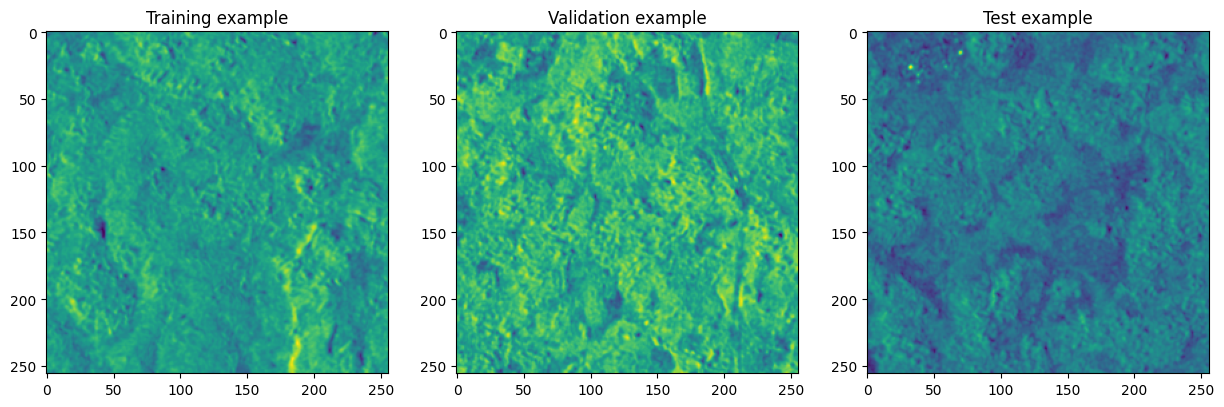

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3, figsize=(15,10))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(X_train[0][:,:,0])
axarr[0].set_title('Training example')
axarr[1].imshow(X_val[0][:,:,0])
axarr[1].set_title('Validation example')
axarr[2].imshow(X_test[0][:,:,0])
axarr[2].set_title('Test example')
plt.show()


<Figure size 640x480 with 0 Axes>

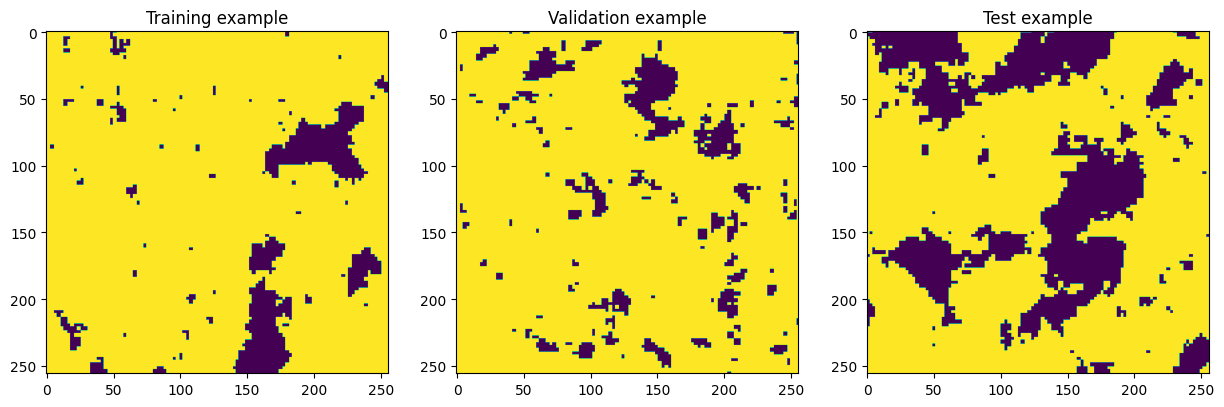

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3, figsize=(15,10))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(y_train[0])
axarr[0].set_title('Training example')
axarr[1].imshow(y_val[0])
axarr[1].set_title('Validation example')
axarr[2].imshow(y_test[0])
axarr[2].set_title('Test example')
plt.show()

In [ ]:
print(X_train[0].shape)
print(y_train[0].shape)

(256, 256, 2)
(256, 256, 1)


In [ ]:
# TensorFlow validation set
X_val_images = np.stack(X_val)
y_val_images = np.stack(y_val)
validation_df = tf.data.Dataset.from_tensor_slices((X_val_images,y_val_images))

## DATA AUGMENTATION (SENTINEL1)

In [ ]:
def trainGenerator(batch_size,
                   image_array,
                   mask_array,
                   weights_array,
                   aug_dict,
                   image_save_prefix  = "image",
                   mask_save_prefix  = "label",
                   weight_save_prefix  = "weight",
                   num_class = 2,
                   save_to_dir = None,
                   target_size = (256,256),
                   seed = 1):

    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    weight_datagen = ImageDataGenerator(**aug_dict)

    image_generator = image_datagen.flow(image_array,
                                           batch_size = batch_size,
                                           save_to_dir = save_to_dir,
                                           save_prefix = image_save_prefix,
                                           seed = seed)

    mask_generator = mask_datagen.flow(mask_array,
                                           batch_size = batch_size,
                                           save_to_dir = save_to_dir,
                                           save_prefix = mask_save_prefix,
                                           seed = seed)

    weight_generator = weight_datagen.flow(weights_array,
                                           batch_size = batch_size,
                                           save_to_dir = save_to_dir,
                                           save_prefix = weight_save_prefix,
                                           seed = seed)

    train_generator = zip(image_generator, mask_generator, weight_generator)

    for (img,mask,weight) in train_generator:
        yield (img, mask,weight)

In [ ]:
#
# Produce generators for training images
#
X_train_images = np.stack(X_train)
y_train_images = np.stack(y_train)
w_train_images = np.stack(w_train)

# Set parameters for data augmentation
data_gen_args = dict(rotation_range=180,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    vertical_flip = True,
                    fill_mode='reflect',
                    )

# train = trainGenerator(1, training_images, labels_images, data_gen_args, save_to_dir=None)

## CREATE MODELS (SENTINEL1)

In [ ]:
########################### UNET ###########################
'''
  Convolutional block with set parameters and activation layer after
'''

def convBlock(input, filters, kernel, kernel_init='he_normal', act='relu', transpose=False):
  if transpose == False:
    #conv = ZeroPadding2D((1,1))(input)
    conv = Conv2D(filters, kernel, padding = 'same', kernel_initializer = kernel_init)(input)
  else:
    #conv = ZeroPadding2D((1,1))(input)
    conv = Conv2DTranspose(filters, kernel, padding = 'same', kernel_initializer = kernel_init)(input)

  conv = Activation(act)(conv)
  return conv

'''
  U-Net model
'''

def UNet2D(trained_weights = None, input_size = (512,512,2), drop_rate = 0.25, lr=0.0001):

    ## Can add pretrained weights by specifying 'trained_weights'

    # Input layer
    # inputs = Input(input_size, batch_size=1)
    inputs = Input(input_size)

    ## Contraction phase
    conv1 = convBlock(inputs, 64, 3)
    conv1 = convBlock(conv1, 64, 3)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = convBlock(pool1, 128, 3)
    conv2 = convBlock(conv2, 128, 3)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    #drop2 = Dropout(drop_rate)(pool2)

    conv3 = convBlock(pool2, 256, 3)
    conv3 = convBlock(conv3, 256, 3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    #drop3 = Dropout(drop_rate)(pool3)

    conv4 = convBlock(pool3, 512, 3)
    conv4 = convBlock(conv4, 512, 3)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    #drop4 = Dropout(drop_rate)(pool4)

    conv5 = convBlock(pool4, 1024, 3)
    conv5 = convBlock(conv5, 1024, 3)

    ## Expansion phase
    up6 = (Conv2DTranspose(512, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv5))
    merge6 = concatenate([conv4,up6])
    conv6 = convBlock(merge6, 512, 3)
    conv6 = convBlock(conv6, 512, 3)
    #conv6 = Dropout(drop_rate)(conv6)

    up7 = (Conv2DTranspose(256, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv6))
    merge7 = concatenate([conv3,up7])
    conv7 = convBlock(merge7, 256, 3)
    conv7 = convBlock(conv7, 256, 3)
    #conv7 = Dropout(drop_rate)(conv7)

    up8 = (Conv2DTranspose(128, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv7))
    merge8 = concatenate([conv2,up8])
    conv8 = convBlock(merge8, 128, 3)
    conv8 = convBlock(conv8, 128, 3)
    #conv8 = Dropout(drop_rate)(conv8)

    up9 = (Conv2DTranspose(64, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv8))
    merge9 = concatenate([conv1,up9])
    conv9 = convBlock(merge9, 64, 3)
    conv9 = convBlock(conv9, 64, 3)

    # Output layer
    conv10 = convBlock(conv9, 1, 1, act='sigmoid')
    # Output layer beta

    model = Model(inputs, conv10)

    model.compile(optimizer = adam_v2.Adam(learning_rate = lr), loss = 'binary_crossentropy', metrics = metrics_list)

    if trained_weights != None:
    	model.load_weights(trained_weights)

    return model

In [ ]:
'''
  Convolutional block with two conv layers and two activation layers
'''

def convBlock2(input, filters, kernel, kernel_init='he_normal', act='relu', transpose=False):
  if transpose == False:
    conv = Conv2D(filters, kernel, padding = 'same', kernel_initializer = kernel_init)(input)
    conv = Activation(act)(conv)
    conv = Conv2D(filters, kernel, padding = 'same', kernel_initializer = kernel_init)(conv)
    conv = Activation(act)(conv)
  else:
    conv = Conv2DTranspose(filters, kernel, padding = 'same', kernel_initializer = kernel_init)(input)
    conv = Activation(act)(conv)
    conv = Conv2DTranspose(filters, kernel, padding = 'same', kernel_initializer = kernel_init)(conv)
    conv = Activation(act)(conv)

  return conv

'''
  Attention block/mechanism
'''
def attention_block(x, gating, inter_shape, drop_rate=0.25):

    # Find shape of inputs
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

    ## Process x vector and gating signal
    # x vector input and processing
    theta_x = Conv2D(inter_shape, kernel_size = 1, strides = 1, padding='same', kernel_initializer='he_normal', activation=None)(x)
    theta_x = MaxPooling2D((2,2))(theta_x)
    shape_theta_x = K.int_shape(theta_x)

    # gating signal ""
    phi_g = Conv2D(inter_shape, kernel_size = 1, strides = 1, padding='same', kernel_initializer='he_normal', activation=None)(gating)
    shape_phi_g = K.int_shape(phi_g)

    # Add components
    concat_xg = add([phi_g, theta_x])
    act_xg = Activation('relu')(concat_xg)

    # Apply convolution
    psi = Conv2D(1, kernel_size = 1, strides = 1, padding='same', kernel_initializer='he_normal', activation=None)(act_xg)

    # Apply sigmoid activation
    sigmoid_xg = Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)

    # UpSample and resample to correct size
    upsample_psi = UpSampling2D(interpolation='bilinear', size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)
    upsample_psi = tf.broadcast_to(upsample_psi, shape=shape_x)
    y = multiply([upsample_psi, x])

    return y


'''
  Attention U-Net model
'''

def UNetAM2D(trained_weights = None, input_size = (512,512,2), drop_rate = 0.25, lr=0.0001, filter_base=16):

    ## Can add pretrained weights by specifying 'trained_weights'

    # Input layer
    inputs = Input(input_size, batch_size=1)

    ## Contraction phase
    conv = convBlock2(inputs, filter_base, 3)
    #conv0 = Dropout(drop_rate)(conv0)

    conv0 = MaxPooling2D(pool_size=(2, 2))(conv)
    conv0 = convBlock2(conv0, 2 * filter_base, 3)

    pool0 = MaxPooling2D(pool_size=(2, 2))(conv0)
    conv1 = convBlock2(pool0, 4 * filter_base, 3)
    #conv1 = Dropout(drop_rate)(conv1)

    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = convBlock2(pool1, 8 * filter_base, 3)
    #conv2 = Dropout(drop_rate)(conv2)

    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = convBlock2(pool2, 16 * filter_base, 3)
    #conv3 = Dropout(drop_rate)(conv3)

    ## Expansion phase
    up4 = (Conv2DTranspose(8 * filter_base, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv3))
    merge4 = attention_block(conv2, conv3, 8 * filter_base, drop_rate) # Attention gate
    conv4 = concatenate([up4, merge4])
    conv4 = convBlock2(conv4, 8 * filter_base, 3)

    up5 = (Conv2DTranspose(4 * filter_base, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv4))
    merge5 = attention_block(conv1, conv4, 4 * filter_base, drop_rate) # Attention gate
    conv5 = concatenate([up5, merge5])
    conv5 = convBlock2(conv5, 4 * filter_base, 3)

    up6 = (Conv2DTranspose(2 * filter_base, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv5))
    merge6 = attention_block(conv0, conv5, 2 * filter_base, drop_rate) # Attention gate
    conv6 = concatenate([up6, merge6])
    conv6 = convBlock2(conv6, 2 * filter_base, 3)

    up7 = (Conv2DTranspose(1 * filter_base, kernel_size=2, strides=2, kernel_initializer='he_normal')(conv6))
    merge7 = attention_block(conv, conv6, 1 * filter_base, drop_rate) # Attention gate
    conv7 = concatenate([up7, merge7])
    conv7 = concatenate([up7, conv])
    conv7 = convBlock2(conv7, 1 * filter_base, 3)

    ## Output layer
    out = convBlock(conv7, 1, 1, act='sigmoid')

    model = Model(inputs, out)

    model.compile(optimizer = adam_v2.Adam(learning_rate = lr), loss = binary_crossentropy, metrics = metrics_list)

    if trained_weights != None:
    	model.load_weights(trained_weights)

    return model

In [ ]:
# Forked code from: https://github.com/ykamikawa/tf-keras-SegNet

from keras.layers import Layer

'''
  Unpooling using max pooling indices
'''

class MaxPoolingWithArgmax2D(Layer):
    def __init__(self, pool_size=(2, 2), strides=(2, 2), padding="same", **kwargs):
        super(MaxPoolingWithArgmax2D, self).__init__(**kwargs)

    def call(self, inputs, **kwargs):
        padding = 'same'
        pool_size = (2,2)
        strides = (2,2)
        if K.backend() == "tensorflow":
            ksize = [1, pool_size[0], pool_size[1], 1]
            padding = padding.upper()
            strides = [1, strides[0], strides[1], 1]
            output, argmax = K.tf.nn.max_pool_with_argmax(
                inputs, ksize=ksize, strides=strides, padding=padding
            )
        else:
            errmsg = "{} backend is not supported for layer {}".format(
                K.backend(), type(self).__name__
            )
            raise NotImplementedError(errmsg)
        argmax = K.cast(argmax, K.floatx())
        return [output, argmax]

class MaxUnpooling2D(Layer):
    def __init__(self, size=(2, 2), **kwargs):
        super(MaxUnpooling2D, self).__init__(**kwargs)
        self.size = size

    def call(self, inputs, output_shape=None):
        updates, mask = inputs[0], inputs[1]
        with tf.compat.v1.variable_scope(self.name):
            mask = K.cast(mask, "int32")
            input_shape = K.tf.shape(updates, out_type="int32")
            #  calculation new shape
            if output_shape is None:
                output_shape = (
                    input_shape[0],
                    input_shape[1] * self.size[0],
                    input_shape[2] * self.size[1],
                    input_shape[3],
                )
            self.output_shape1 = output_shape

            # calculation indices for batch, height, width and feature maps
            one_like_mask = K.ones_like(mask, dtype="int32")
            batch_shape = K.concatenate([[input_shape[0]], [1], [1], [1]], axis=0)
            batch_range = K.reshape(
                K.tf.range(output_shape[0], dtype="int32"), shape=batch_shape
            )
            b = one_like_mask * batch_range
            y = mask // (output_shape[2] * output_shape[3])
            x = (mask // output_shape[3]) % output_shape[2]
            feature_range = K.tf.range(output_shape[3], dtype="int32")
            f = one_like_mask * feature_range

            # transpose indices & reshape update values to one dimension
            updates_size = K.tf.size(updates)
            indices = K.transpose(K.reshape(K.stack([b, y, x, f]), [4, updates_size]))
            values = K.reshape(updates, [updates_size])
            ret = K.tf.scatter_nd(indices, values, output_shape)
            return ret

    def compute_output_shape(self, input_shape):
        mask_shape = input_shape[1]
        return (
            mask_shape[0],
            mask_shape[1] * self.size[0],
            mask_shape[2] * self.size[1],
            mask_shape[3],
        )

# Custom version of MaxUnpooling2D
# Takes raw layer values and outputs values
# Takes tf.nn.max_pool_with_argmax output as input
def unpool_with_indices(pool, indices, out_size=2):
  print(pool)
  print(indices)
  # Create empty array of appropriate size
  shape = np.array(np.shape(pool))
  shape = np.array((shape[0], out_size * shape[1], out_size * shape[2], shape[3]))
  out = np.zeros(shape)

  # Make upsample
  inds = np.array(indices).flatten()
  outs = np.array(pool).flatten()
  for i in range(len(inds)):
    blk = inds[i] // (shape[2] * shape[3]) # Find which block to place numbers in
    ln  = inds[i] - (blk * shape[3] * shape[2]) # Find which line
    ln2 = ln // (shape[3]) # Find line
    pos = ln % (shape[3]) # Find position
    #print(blk, ln2, pos)
    out[0][blk][ln2][pos] = outs[i]


  #print(out.shape)
  return (out)

# Own custom code
'''
  ResNet Contraction Phase Block
'''

def resnetConvDownBlock(x, filter, kernel, act='relu'):
  # Convolutional Block for encoding phase
  for i in range(3):
    x = ZeroPadding2D((1,1))(x)
    x = Conv2D(filters = filter, kernel_size = kernel, kernel_initializer = 'he_normal')(x)
    x = Activation('relu')(x)

  return x

'''
  SegNet Expansion Phase Block
'''
def resnetConvUpBlock(x, skip_connection = None, filter = None, kernel = None, act='relu'):
  # Convolutional block for decoding phase

  out = x

  # Unpooling
  out = UpSampling2D((2,2))(out)

  # Conv Block
  for i in range(3):
    out = ZeroPadding2D((1,1))(out)
    out = Conv2D(filters = filter, kernel_size = kernel, kernel_initializer = 'he_normal')(out)
    out = Activation('relu')(out)

  # Implement skip connection
  if skip_connection != None:
    out = Add()([out, skip_connection])

  return out

def ResNet50SegNet2D(input_size=(512,512,2), lr = 0.0001, filters = 64, kernel_sz = 3):

  inputs = Input(input_size)

  # Encoder
  # Conv, Conv, Conv, MaxPool #1
  block1 = resnetConvDownBlock(inputs, filter = filters, kernel = kernel_sz)
  pool1, mask1 = MaxPoolingWithArgmax2D((2,2))(block1)
  # Conv, Conv, Conv, MaxPool #2
  block2 = resnetConvDownBlock(pool1, filter = 2 * filters, kernel = kernel_sz)
  pool2, mask2 = MaxPoolingWithArgmax2D((2,2))(block2)
  # Conv, Conv, Conv, MaxPool #3
  block3 = resnetConvDownBlock(pool2, filter = 4 * filters, kernel = kernel_sz)
  pool3, mask3 = MaxPoolingWithArgmax2D((2,2))(block3)
  # Conv, Conv, Conv, MaxPool #4
  block4 = resnetConvDownBlock(pool3, filter = 8 * filters, kernel = kernel_sz)
  pool4, mask4 = MaxPoolingWithArgmax2D((2,2))(block4)
  # Conv, Conv, Conv, MaxPool #5
  block5 = resnetConvDownBlock(pool4, filter = 16 * filters, kernel = kernel_sz)
  pool5, mask5 = MaxPoolingWithArgmax2D((2,2))(block5)

  # Decoder
  # ConvTranspose + Concat, Conv, Conv, Conv #1
  block5_ = resnetConvUpBlock(pool5, filter = 16 * filters, kernel = kernel_sz)
  # ConvTranspose + Concat, Conv, Conv, Conv #2
  block4_ = resnetConvUpBlock(block5_, skip_connection = MaxUnpooling2D((2,2))([pool4, mask4]), filter = 8 * filters, kernel = kernel_sz)
  # ConvTranspose + Concat, Conv, Conv, Conv #3
  block3_ = resnetConvUpBlock(block4_, skip_connection = MaxUnpooling2D((2,2))([pool3, mask3]), filter = 4 * filters, kernel = kernel_sz)
  # ConvTranspose + Concat, Conv, Conv, Conv #4
  block2_ = resnetConvUpBlock(block3_, skip_connection = MaxUnpooling2D((2,2))([pool2, mask2]), filter = 2 * filters, kernel = kernel_sz)
  # ConvTranspose + Concat, Conv, Conv, Conv #5
  block1_ = resnetConvUpBlock(block2_, skip_connection = MaxUnpooling2D((2,2))([pool1, mask1]), filter = filters, kernel = kernel_sz)

  # Output
  outputs = Conv2D(1, kernel_size = 1, strides = 1, kernel_initializer = 'he_normal')(block1_)
  outputs = Activation('sigmoid')(outputs)

  model = Model(inputs, outputs)
  model.compile(optimizer = adam_v2.Adam(learning_rate = lr), loss = binary_crossentropy, metrics = metrics_list)

  return model

In [ ]:
# Code forked and modified from: https://github.com/divamgupta/image-segmentation-keras

'''
  FCN32-VGG16 model
'''

def fcn_32_2d(input_size = (256,256,2), lr = 0.0001, drop_rate = 0):

    kernel = 3
    filter_size = 64
    pad = 1
    pool_size = 2

    IMAGE_ORDERING = 'channels_last'
    # Input
    inputs = Input(shape=input_size)

    x = inputs
    levels = []

    ## Encoder
    # Block 1
    x = Conv2D(64, (3, 3), padding='same',
               name='block1_conv1', data_format=IMAGE_ORDERING)(inputs)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same',
               name='block1_conv2', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool',
                     data_format=IMAGE_ORDERING)(x)
    levels.append(x)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same',
               name='block2_conv1', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same',
               name='block2_conv2', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool',
                     data_format=IMAGE_ORDERING)(x)
    levels.append(x)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same',
               name='block3_conv1', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same',
               name='block3_conv2', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same',
               name='block3_conv3', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool',
                     data_format=IMAGE_ORDERING)(x)
    levels.append(x)

    # Block 4
    x = Conv2D(512, (3, 3), padding='same',
               name='block4_conv1', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same',
               name='block4_conv2', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same',
               name='block4_conv3', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool',
                     data_format=IMAGE_ORDERING)(x)
    levels.append(x)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same',
               name='block5_conv1', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same',
               name='block5_conv2', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same',
               name='block5_conv3', data_format=IMAGE_ORDERING)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool',
                     data_format=IMAGE_ORDERING)(x)

    levels.append(x)

    [f1, f2, f3, f4, f5] = levels

    o = f5

    # Decoder
    o = (Conv2D(4096, (7 , 7 ), padding = 'same', kernel_initializer = 'he_normal', name = "conv6"))(o)
    o = Activation('relu')(o)
    o = Dropout(drop_rate)(o)
    o = (Conv2D(4096, (1 , 1 ), padding = 'same', kernel_initializer = 'he_normal', name = "conv7"))(o)
    o = Activation('relu')(o)
    o = Dropout(drop_rate)(o)

    o = (Conv2D(1, 1, padding='same', kernel_initializer='he_normal', name="scorer1"))(o)
    o = Conv2DTranspose(1, kernel_size=(64,64), padding='same', strides=(32,32), name="Upsample32")(o)
    o = (Conv2D(1, 1, padding='same', kernel_initializer='he_normal', name="output"))(o)

    # Output
    o = Activation('sigmoid')(o)

    model = Model(inputs, o)
    model.compile(optimizer = adam_v2.Adam(learning_rate = lr), loss = binary_crossentropy, metrics = metrics_list)
    model.model_name = "fcn_32"
    return model

## TRAINING UNET (SENTINEL1)

In [ ]:
# UNET
# Train U-Net with generator
model_unet2D = UNet2D(input_size=(256,256,2), lr=0.0001)
save_model = ModelCheckpoint(f'{result_dir}/{unet_sent1_model_name}', monitor='val_loss',verbose=1, save_best_only=True)
train = trainGenerator(1, X_train_images, y_train_images, w_train_images, data_gen_args, save_to_dir=None)

model_unet2D.fit(train, steps_per_epoch=100, epochs=30, validation_data = (X_val_images, y_val_images), callbacks=[save_model])

Epoch 1/30
 99/100 [============================>.] - ETA: 0s - loss: 0.2031 - true_positives_1: 13334256.0000 - true_negatives_1: 560723.0000 - precision_1: 0.8661 - recall_1: 0.9735 - false_negatives_1: 362690.0000 - false_positives_1: 2060795.0000 - binary_io_u_1: 0.5014 - io_u_1: 0.0893 - binary_accuracy: 0.8341 - mean_squared_error: 0.1169
Epoch 1: val_loss improved from inf to 0.42628, saving model to /gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/results/dataset_02_mean/test_3_p1_p99/unet-sent1.hdf5
100/100 [==============================] - 10s 72ms/step - loss: 0.2029 - true_positives_1: 13388644.0000 - true_negatives_1: 563279.0000 - precision_1: 0.8665 - recall_1: 0.9732 - false_negatives_1: 368424.0000 - false_positives_1: 2063653.0000 - binary_io_u_1: 0.5016 - io_u_1: 0.0892 - binary_accuracy: 0.8341 - mean_squared_error: 0.1168 - val_loss: 0.4263 - val_true_positives_1: 7548433.0000 - val_true_negatives_1: 582117.0000 - val_precision_1: 0.

In [ ]:
# Save model training history
np.save(f'{result_dir}/{unet_sent1_history}', model_unet2D.history.history)

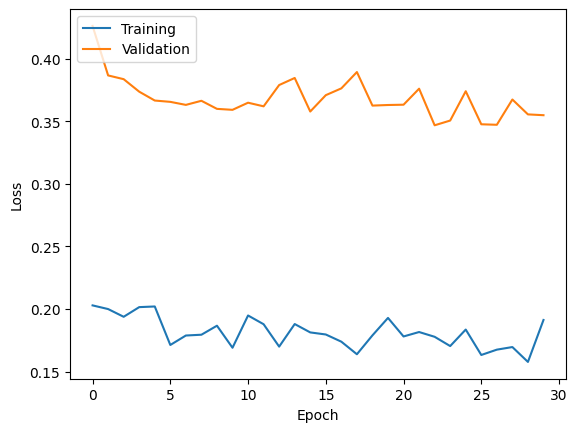

In [ ]:
# Plot accuracy and loss

## Accuracy
# plt.plot(model_unet2D.history.history['accuracy'])
# plt.plot(model_unet2D.history.history['val_accuracy'])
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
# plt.show()
# plt.savefig(f"{result_dir}/unet-2d-sent1-accuracy.png")


## Loss
plt.plot(model_unet2D.history.history['loss'])
plt.plot(model_unet2D.history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.savefig(f"{result_dir}/unet-2d-sent1-loss.png")

1/1 [==============================] - 0s 255ms/step


<Figure size 640x480 with 0 Axes>

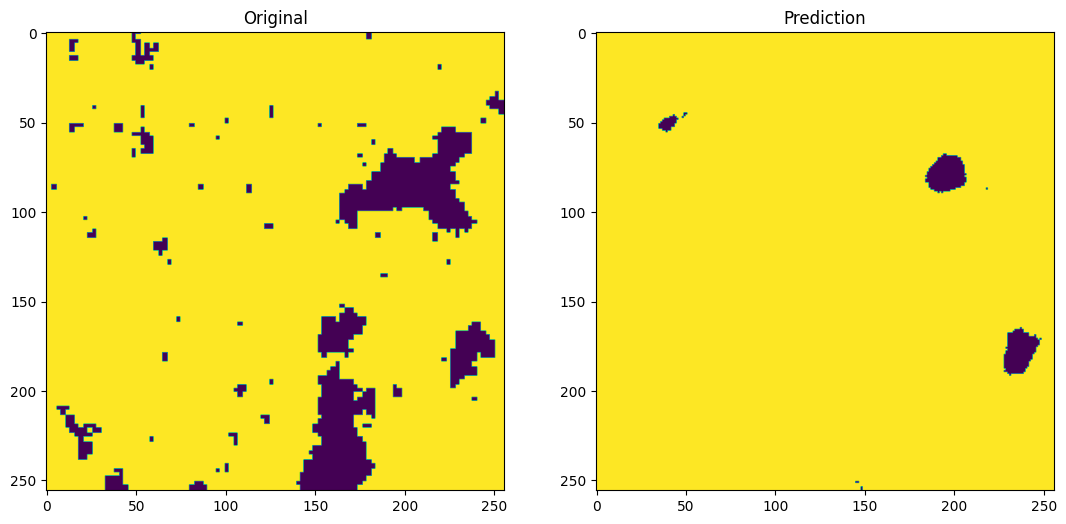

In [ ]:
# Predicting one image
predicted_image = model_unet2D.predict(X_train_images[0].reshape(1,256,256,2)) > 0.5

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2, figsize=(13,10))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(y_train_images[0])
axarr[0].set_title('Original')
axarr[1].imshow(predicted_image[0])
axarr[1].set_title('Prediction')
plt.show()

<Figure size 640x480 with 0 Axes>

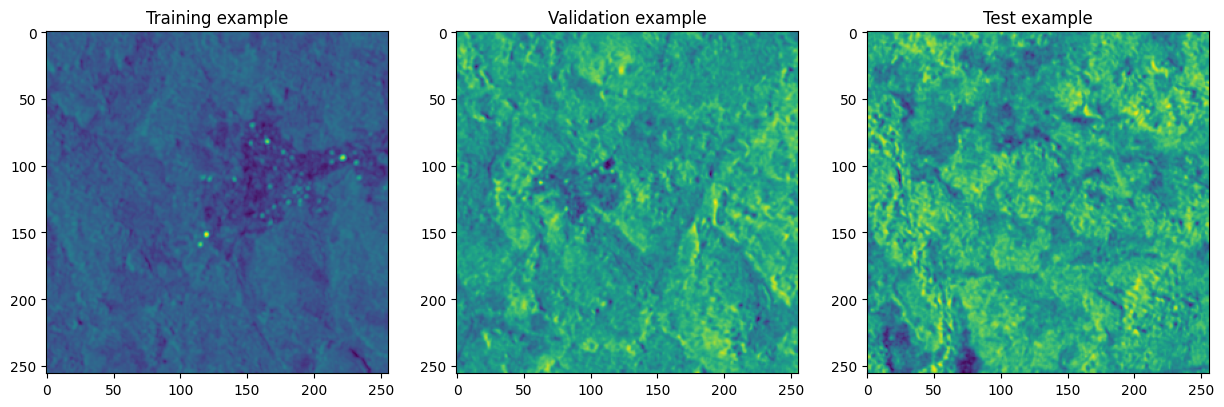

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3, figsize=(15,10))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(X_train[1][:,:,0])
axarr[0].set_title('Training example')
axarr[1].imshow(X_val[1][:,:,0])
axarr[1].set_title('Validation example')
axarr[2].imshow(X_test[1][:,:,0])
axarr[2].set_title('Test example')
plt.show()

# X_train[0].plot.imshow()

<Figure size 640x480 with 0 Axes>

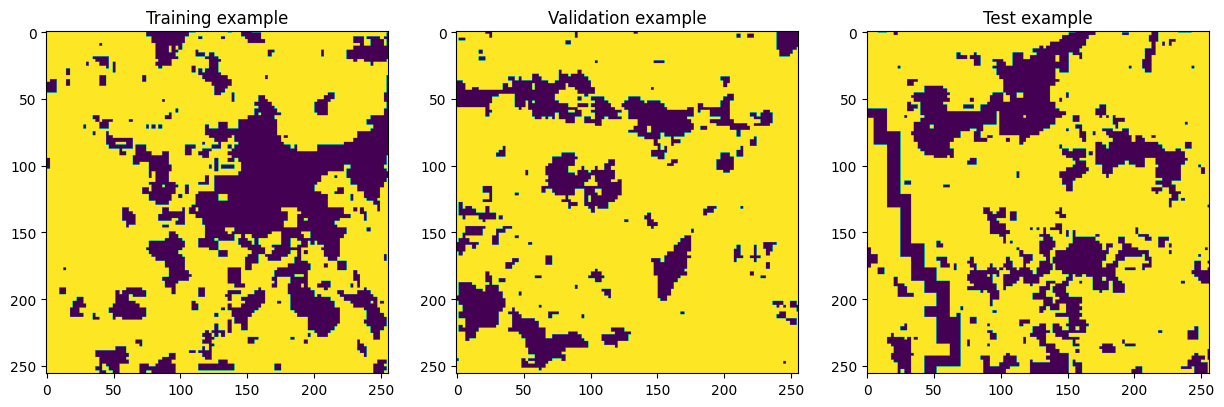

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3, figsize=(15,10))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(y_train[1])
axarr[0].set_title('Training example')
axarr[1].imshow(y_val[1])
axarr[1].set_title('Validation example')
axarr[2].imshow(y_test[1])
axarr[2].set_title('Test example')
plt.show()


## TRAINING ATTENTION UNET (SENTINEL 1)

In [ ]:
# Attention UNET
# Train U-Net with generator
model_am_unet2D = UNetAM2D(input_size=(256,256,2), lr=0.0001)
model_am_unet2D.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(1, 256, 256, 2)]   0           []                               
                                                                                                  
 conv2d_131 (Conv2D)            (1, 256, 256, 16)    304         ['input_7[0][0]']                
                                                                                                  
 activation_143 (Activation)    (1, 256, 256, 16)    0           ['conv2d_131[0][0]']             
                                                                                                  
 conv2d_132 (Conv2D)            (1, 256, 256, 16)    2320        ['activation_143[0][0]']         
                                                                                            

In [ ]:
save_model = ModelCheckpoint(f'{result_dir}/{am_unet_sent1_model_name}', monitor='val_loss',verbose=1, save_best_only=True)
train = trainGenerator(1, X_train_images, y_train_images, w_train_images, data_gen_args, save_to_dir=None)
model_am_unet2D.fit(train, batch_size=1, steps_per_epoch=100, epochs=30, validation_data = (X_val_images, y_val_images), callbacks=[save_model])

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.2464 - true_positives_1: 13300164.0000 - true_negatives_1: 514194.0000 - precision_1: 0.8629 - recall_1: 0.9668 - false_negatives_1: 456904.0000 - false_positives_1: 2112738.0000 - binary_io_u_1: 0.4890 - io_u_1: 0.0892 - binary_accuracy: 0.8260 - mean_squared_error: 0.1489
Epoch 1: val_loss improved from inf to 0.43912, saving model to /gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/results/dataset_02_mean/test_3_p1_p99/am-unet-sent1.hdf5
100/100 [==============================] - 7s 44ms/step - loss: 0.2464 - true_positives_1: 13300164.0000 - true_negatives_1: 514194.0000 - precision_1: 0.8629 - recall_1: 0.9668 - false_negatives_1: 456904.0000 - false_positives_1: 2112738.0000 - binary_io_u_1: 0.4890 - io_u_1: 0.0892 - binary_accuracy: 0.8260 - mean_squared_error: 0.1489 - val_loss: 0.4391 - val_true_positives_1: 8082340.0000 - val_true_negatives_1: 5325.0000 - val_precision_1: 0.

In [ ]:
# Save model training history
np.save(f'{result_dir}/{am_unet_sent1_history}', model_am_unet2D.history.history)

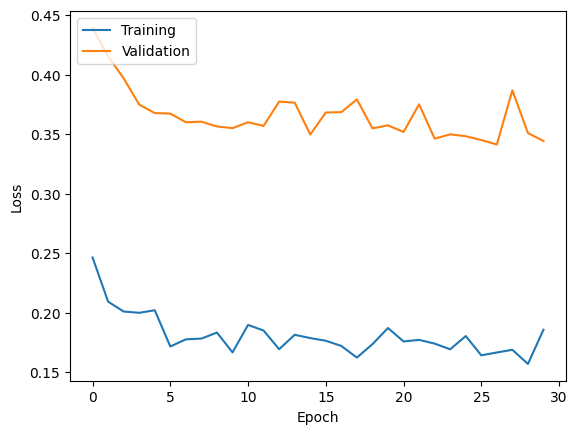

In [ ]:
# Plot accuracy and loss

## Accuracy
# plt.plot(model_am_unet2D.history.history['accuracy'])
# plt.plot(model_am_unet2D.history.history['val_accuracy'])
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
# plt.show()
# plt.savefig(f"{result_dir}/am-unet-2d-sent1-accuracy.png")

## Loss
plt.plot(model_am_unet2D.history.history['loss'])
plt.plot(model_am_unet2D.history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.savefig(f"{result_dir}/am-unet-2d-sent1-loss.png")

## TRAINING RESSEGNET

In [ ]:
# ResNet50SegNet
# Train ResNet50SegNet with generator
model_resnet50segnet2D = ResNet50SegNet2D(input_size=(256,256,2), lr=0.0001)
model_resnet50segnet2D.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 2  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_60 (ZeroPadding  (None, 258, 258, 2)  0          ['input_8[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv2d_162 (Conv2D)            (None, 256, 256, 64  1216        ['zero_padding2d_60[0][0]']      
                                )                                                           

In [ ]:
save_model = ModelCheckpoint(f'{result_dir}/{resnet50segnet_sent1_model_name}', monitor='val_loss',verbose=1, save_best_only=True)
train = trainGenerator(1, X_train_images, y_train_images, w_train_images, data_gen_args, save_to_dir=None)
model_resnet50segnet2D.fit(train, batch_size = 1, steps_per_epoch=100, epochs=30, validation_data = (X_val_images, y_val_images), callbacks=[save_model])

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.2620 - true_positives_1: 13497612.0000 - true_negatives_1: 518349.0000 - precision_1: 0.8649 - recall_1: 0.9811 - false_negatives_1: 259456.0000 - false_positives_1: 2108583.0000 - binary_io_u_1: 0.4984 - io_u_1: 0.0912 - binary_accuracy: 0.8377 - mean_squared_error: 0.1327
Epoch 1: val_loss improved from inf to 0.45095, saving model to /gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/results/dataset_02_mean/test_3_p1_p99/resnet50segnet-sent1.hdf5
100/100 [==============================] - 19s 152ms/step - loss: 0.2620 - true_positives_1: 13497612.0000 - true_negatives_1: 518349.0000 - precision_1: 0.8649 - recall_1: 0.9811 - false_negatives_1: 259456.0000 - false_positives_1: 2108583.0000 - binary_io_u_1: 0.4984 - io_u_1: 0.0912 - binary_accuracy: 0.8377 - mean_squared_error: 0.1327 - val_loss: 0.4510 - val_true_positives_1: 8054119.0000 - val_true_negatives_1: 39090.0000 - val_preci

In [ ]:
# Save model training history
np.save(f'{result_dir}/{resnet50segnet_sent1_history}', model_resnet50segnet2D.history.history)

## FCN32...

In [ ]:
# FCN32
fcn_32_2d = fcn_32_2d(lr = 0.0001)
fcn_32_2d.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256, 256, 2)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1216      
                                                                 
 activation_201 (Activation)  (None, 256, 256, 64)     0         
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 activation_202 (Activation)  (None, 256, 256, 64)     0         
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     7385

In [ ]:
save_model_fcn32_2d = ModelCheckpoint(f'{result_dir}/{fcn32_sent1_model_name}', monitor='val_loss',verbose=1, save_best_only=True)
train = trainGenerator(1, X_train_images, y_train_images, w_train_images, data_gen_args, save_to_dir=None)
fcn_32_2d.fit(train, batch_size = 1, steps_per_epoch=100, epochs=30, validation_data = (X_val_images, y_val_images), callbacks=[save_model_fcn32_2d])

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.3467 - true_positives_1: 13361205.0000 - true_negatives_1: 545027.0000 - precision_1: 0.8652 - recall_1: 0.9712 - false_negatives_1: 395863.0000 - false_positives_1: 2081905.0000 - binary_io_u_1: 0.4975 - io_u_1: 0.0892 - binary_accuracy: 0.8315 - mean_squared_error: 0.2424
Epoch 1: val_loss improved from inf to 0.68919, saving model to /gdrive/MyDrive/Gruppo Ricerca Meo/Researches/Deforestation/Scripts/Ivory_coast/results/dataset_02_mean/test_3_p1_p99/fcn32-sent1.hdf5
100/100 [==============================] - 23s 206ms/step - loss: 0.3467 - true_positives_1: 13361205.0000 - true_negatives_1: 545027.0000 - precision_1: 0.8652 - recall_1: 0.9712 - false_negatives_1: 395863.0000 - false_positives_1: 2081905.0000 - binary_io_u_1: 0.4975 - io_u_1: 0.0892 - binary_accuracy: 0.8315 - mean_squared_error: 0.2424 - val_loss: 0.6892 - val_true_positives_1: 8095556.0000 - val_true_negatives_1: 702.0000 - val_precision_1: 0.8

In [ ]:
# Save model training history
np.save(f'{result_dir}/{fcn32_sent1_history}', fcn_32_2d.history.history)

## TEST SET ANALYSIS FUNCTION

In [ ]:
def compute_accuracy(model, images, labels):
  accuracy_list = []
  for i in range(len(images)):
    y_hat = model.predict(images[i].reshape(1,256,256,2)) > 0.5
    y_hat = np.round(y_hat).flatten()
    acc = accuracy_score(labels[i].flatten(), y_hat)
    accuracy_list.append(acc)
  return np.mean(accuracy_list)

def compute_precision(model, images, labels):
  precision_list = []
  for i in range(len(images)):
    y_hat = model.predict(images[i].reshape(1,256,256,2)) > 0.5
    y_hat = np.round(y_hat).flatten()
    acc = precision_score(labels[i].flatten(), y_hat, average='binary')
    precision_list.append(acc)
  return np.mean(precision_list)

def compute_recall(model, images, labels):
  recall_list = []
  for i in range(len(images)):
    y_hat = model.predict(images[i].reshape(1,256,256,2)) > 0.5
    y_hat = np.round(y_hat).flatten()
    acc = recall_score(labels[i].flatten(), y_hat, average='binary')
    recall_list.append(acc)
  return np.mean(recall_list)

def compute_f1_score(model, images, labels):
  recall_list = []
  for i in range(len(images)):
    y_hat = model.predict(images[i].reshape(1,256,256,2)) > 0.5
    y_hat = np.round(y_hat).flatten()
    acc = f1_score(labels[i].flatten(), y_hat)
    recall_list.append(acc)
  return np.mean(recall_list)

## TEST SET ANALYSIS (SENTINEL1)

---



In [ ]:
from sklearn.metrics import *

In [ ]:
# load models
unet = load_model(f'{result_dir}/{unet_sent1_model_name}',compile=False)
attention_unet = load_model(f'{result_dir}/{am_unet_sent1_model_name}', compile=False)
resnet_segnet = ResNet50SegNet2D(input_size=(256,256,2))
resnet_segnet.load_weights(f'{result_dir}/{resnet50segnet_sent1_model_name}', by_name=True, skip_mismatch=True)
fcn32 = load_model(f'{result_dir}/{fcn32_sent1_model_name}', compile=False)

In [ ]:
# Load dataset again!?
X_test_images = np.stack(X_test)
y_test_images = np.stack(y_test)

In [ ]:
# calculate accuracy
unet_accuracy = compute_accuracy(unet, X_test_images, y_test_images)
unet_precision = compute_precision(unet, X_test_images, y_test_images)
unet_recall = compute_recall(unet, X_test_images, y_test_images)
unet_f1_score = compute_f1_score(unet, X_test_images, y_test_images)
print(f"UNet --> accuracy: {unet_accuracy} - precision: {unet_precision} - recall: {unet_recall} - f1 score: {unet_f1_score}")

1/1 [==============================] - 0s 24ms/step
UNet --> accuracy: 0.8575046793619792 - precision: 0.8557732613549051 - recall: 0.9686852203366688 - f1 score: 0.9048487550633169


In [ ]:
am_unet_accuracy = compute_accuracy(attention_unet, X_test_images, y_test_images)
am_unet_precision = compute_precision(attention_unet, X_test_images, y_test_images)
am_unet_recall = compute_recall(attention_unet, X_test_images, y_test_images)
am_unet_f1_score = compute_f1_score(attention_unet, X_test_images, y_test_images)
print(f"AM-UNet --> accuracy: {am_unet_accuracy} - precision: {am_unet_precision} - recall: {am_unet_recall} - f1 score: {am_unet_f1_score}")

1/1 [==============================] - 0s 28ms/step
AM-UNet --> accuracy: 0.86055419921875 - precision: 0.8578005225216604 - recall: 0.9697316032380828 - f1 score: 0.9067356974908543


In [ ]:
resnet_segnet_accuracy = compute_accuracy(resnet_segnet, X_test_images, y_test_images)
resnet_segnet_precision = compute_precision(resnet_segnet, X_test_images, y_test_images)
resnet_segnet_recall = compute_recall(resnet_segnet, X_test_images, y_test_images)
resnet_segnet_f1_score = compute_f1_score(resnet_segnet, X_test_images, y_test_images)
print(f"Resnet --> accuracy: {resnet_segnet_accuracy} - precision: {resnet_segnet_precision} - recall: {resnet_segnet_recall} - f1 score: {resnet_segnet_f1_score}")

1/1 [==============================] - 0s 44ms/step
Resnet --> accuracy: 0.18753651936848958 - precision: 0.8189544537849491 - recall: 0.0001653514087920292 - f1 score: 0.0003306216260556099


In [ ]:
fcn32_accuracy = compute_accuracy(fcn32, X_test_images, y_test_images)
fcn32_precision = compute_precision(fcn32, X_test_images, y_test_images)
fcn32_recall = compute_recall(fcn32, X_test_images, y_test_images)
fcn32_f1_score = compute_f1_score(fcn32, X_test_images, y_test_images)
print(f"FCN32 --> accuracy: {fcn32_accuracy} - precision: {fcn32_precision} - recall: {fcn32_recall} - f1 score: {fcn32_f1_score}")

1/1 [==============================] - 0s 24ms/step
FCN32 --> accuracy: 0.8384413655598958 - precision: 0.8417392978439752 - recall: 0.9602233943459434 - f1 score: 0.8922759447386723


In [ ]:
# Export results
import pandas as pd
metrics_sent1 = {'classifier': ['U-Net', 'Attention U-Net', 'ResNet50-SegNet', 'FCN32-VGG16'],
              'accuracy': [unet_accuracy, am_unet_accuracy, resnet_segnet_accuracy, fcn32_accuracy],
              'precision': [unet_precision, am_unet_precision, resnet_segnet_precision, fcn32_precision],
              'recall': [unet_recall, am_unet_recall, resnet_segnet_recall, fcn32_recall],
              'f1_score': [unet_f1_score, am_unet_f1_score, resnet_segnet_f1_score, fcn32_f1_score],
              }
metrics_sent1_pd = pd.DataFrame(metrics_sent1)
metrics_sent1_pd.to_csv(f'{result_dir}/metrics_sent1.csv')
print(metrics_sent1_pd)

        classifier  accuracy  precision    recall  f1_score
0            U-Net  0.857505   0.855773  0.968685  0.904849
1  Attention U-Net  0.860554   0.857801  0.969732  0.906736
2  ResNet50-SegNet  0.187537   0.818954  0.000165  0.000331
3      FCN32-VGG16  0.838441   0.841739  0.960223  0.892276
